In [1001]:
import pydot
import numpy as np
import pandas as pd
import seaborn as sns
from math import sqrt
from sklearn import metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf
from pmdarima.arima import auto_arima
from sklearn.datasets import make_moons
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.ensemble import (
    RandomForestRegressor,
    AdaBoostRegressor,
    GradientBoostingRegressor,
)

# Dataframe:

### Vendas por tempo de experiência:

In [1002]:
df = {
    "tempo":[1,3,4,4,6,8,10,10,11,13],
    "vendas":[91,110,106,116,119,129,139,143,138,159],
}
df = pd.DataFrame(
    df
)

In [1003]:
display(df.head())

,tempo,vendas
0,1,91
1,3,110
2,4,106
3,4,116
4,6,119


### Alunos Aprovados:

In [1004]:
path = r'../../../data/aprovacao_alunos.xlsx'
df_alunos = pd.read_excel(
    io=path
)

In [1005]:
display(df_alunos.head())

,UF,ano_2015,ano_2016
0,Rondonia,77,85
1,Acre,79,81
2,Amazonas,83,85
3,Roraima,81,82
4,Para,73,76


### Limiti de credito:

In [1006]:
path = r'../../../data/Limite_Credito.xlsx'
df_limite = pd.read_excel(
    io=path
)

In [1007]:
display(df_limite.head())

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial
0,70,10736,5214,400,500
1,68,5000,5000,380,600
2,44,5800,5800,500,800
3,72,4300,4300,2000,1000
4,75,4400,4400,3000,1000


### Lucro Escola DNC:

In [1008]:
path = r'../../../data/Exercicio_Lucro.xlsx'
df_lucro = pd.read_excel(
    io=path
)

In [1009]:
display(df_lucro.head())

,Investimento,Investimento_Mkt,Gastos_Administrativos,Lucro
0,0,45173,116984,14681
1,542,0,51743,35673
2,0,0,135427,42560
3,1315,297114,115816,49491
4,1000,1904,124153,64926


### Limiti de credito escolaridade:

In [1010]:
path = r'../../../data/Escolaridade_Limite_Credito.xlsx'
df_escolaridade = pd.read_excel(
    io=path
)

In [1011]:
display(df_escolaridade.head())

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial,Escolaridade
0,70,10736,5214,400,500,Fundamental_Medio
1,68,5000,5000,380,600,Fundamental_Medio
2,44,5800,5800,500,800,Fundamental_Medio
3,72,4300,4300,2000,1000,Fundamental_Medio
4,75,4400,4400,3000,1000,Fundamental_Medio


### Limiti de credito dummy:

In [1012]:
path = r'../../../data/Limite_Credito_Dummy.xlsx'
df_dummy = pd.read_excel(
    io=path
)

In [1013]:
display(df_escolaridade.head())

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial,Escolaridade
0,70,10736,5214,400,500,Fundamental_Medio
1,68,5000,5000,380,600,Fundamental_Medio
2,44,5800,5800,500,800,Fundamental_Medio
3,72,4300,4300,2000,1000,Fundamental_Medio
4,75,4400,4400,3000,1000,Fundamental_Medio


### Imóveis:

In [1014]:
path = r'../../../data/imoveis.xlsx'
df_imoveis = pd.read_excel(
    io=path
)

In [1015]:
display(df_imoveis.head())

,area,preco
0,359.87,25000
1,353.12,45000
2,341.89,45000
3,435.99,20000
4,341.77,25000


### Alunos aprovados 2015 e 2016:

In [1016]:
path = r'../../../data/aprovacao_alunos_2015_2016.xlsx'
df_aprovados = pd.read_excel(
    io=path
)

In [1017]:
display(df_aprovados.head())

,ano_2015,ano_2016
0,77,85
1,79,81
2,83,85
3,81,82
4,73,76


### Limiti com varios Dummys:

In [1018]:
path = r'../../../data/Limite_Dummy.xlsx'
df_limiti_dummy = pd.read_excel(
    io=path
)

In [1019]:
display(df_limiti_dummy.head())

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
0,70,10736,5214,400,Fundamental_Medio,RJ,F,500
1,68,5000,5000,380,Fundamental_Medio,RJ,F,600
2,44,5800,5800,500,Fundamental_Medio,RJ,F,800
3,72,4300,4300,2000,Fundamental_Medio,RJ,F,1000
4,75,4400,4400,3000,Fundamental_Medio,RJ,F,1000


### Temperatura:

In [1020]:
path = r'../../../data/temps.xlsx'
df_temps = pd.read_excel(
    io=path
)

In [1021]:
display(df_temps.head())

,year,month,day,week,temp_2,temp_1,average,actual
0,2016,1,1,Fri,45,45,45.6,45
1,2016,1,2,Sat,44,45,45.7,44
2,2016,1,3,Sun,45,44,45.8,41
3,2016,1,4,Mon,44,41,45.9,40
4,2016,1,5,Tues,41,40,46.0,44


### Series Temporais energia:

In [1022]:
path = r'../../../data/energy.xlsx'
df_energy = pd.read_excel(
    io=path
)

In [1023]:
display(df_energy.head())

,DATE,energy
0,1985-01-01,71.5920
1,1985-02-01,69.7870
2,1985-03-01,61.6790
3,1985-04-01,56.7479
4,1985-05-01,54.6165


### Seguros:

In [1024]:
path = r'../../../data/insurance.xlsx'
df_insurance = pd.read_excel(
    io=path
)

In [1025]:
display(df_insurance.head())

,idade,sexo,imc,quantidade_filhos,fumante,regiao,custos_seguro
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.560,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Machine Learning:

## Regressão Linear:

### Código:

In [1026]:
class RegressãoLinear():
    def treinamento(self):
        pass

    def previsão(self):
        pass

    def gráfico_de_reta_linear(self, dataframe, x, y):
        sns.lmplot(
            data=dataframe, 
            x=x,
            y=y
        )
        ax = plt.gca()
        ax.set_title("Reta de Regressão - Tempo x Venda")
        plt.show()

    def verificando_a_correlação(self, dataframe):
        dataframe = dataframe.corr()
        return dataframe

    def modelo_de_ols(self, x, y):
        x = sm.add_constant(x)
        y = y
        treinamento = sm.OLS(y, x).fit()
        return treinamento
    
    def resumo_do_modelo(self, modelo):
        print(modelo.summary())

if __name__ == '__main__':
    regressão_linear = RegressãoLinear()

### Output:

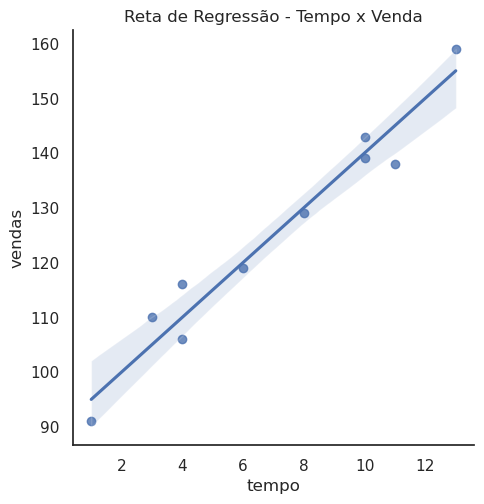

In [1027]:
regressão_linear.gráfico_de_reta_linear(
    dataframe=df,
    x='tempo',
    y='vendas'
)

In [1028]:
regressão_linear.verificando_a_correlação(dataframe=df).head()

,tempo,vendas
tempo,1.000000,0.976883
vendas,0.976883,1.000000


In [1029]:
treinando_modelo_ols = regressão_linear.modelo_de_ols(
    x=df.tempo,
    y=df.vendas
)

### Prevendo as vendas x tempo:

In [1030]:
df['Y_previsto'] = treinando_modelo_ols.predict()

### Verificando o residuo:

In [1031]:
df["residuo"] = df["Y_previsto"] - df["vendas"]

In [1032]:
df.head(5)

,tempo,vendas,Y_previsto,residuo
0,1,91,95.0,4.0
1,3,110,105.0,-5.0
2,4,106,110.0,4.0
3,4,116,110.0,-6.0
4,6,119,120.0,1.0


In [1033]:
regressão_linear.resumo_do_modelo(
    modelo=treinando_modelo_ols
)

                            OLS Regression Results                            
Dep. Variable:                 vendas   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     167.1
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           1.22e-06
Time:                        12:02:00   Log-Likelihood:                -28.355
No. Observations:                  10   AIC:                             60.71
Df Residuals:                       8   BIC:                             61.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         90.0000      3.075     29.265      0.0

/home/guerrlr0/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## Execício:

### Código:

In [1034]:
class ExercíciosRegressãoLinear():
    def verificando_as_dimensões_do_dataframe(self, dataframe):
        dataframe = dataframe.shape
        print(f'Linhas: {dataframe[0]} \nColunas: {dataframe[1]}')

    def descrição(self, dataframe):
        dataframe = dataframe.describe().round(decimals=2)
        display(dataframe)

    def verificando_valores_nulos(self, dataframe):
        valores_nulos = dataframe.isnull().sum()
        percent_missing = (valores_nulos / len(dataframe))
        dataframe = pd.DataFrame(
            {
            'Quantidade': valores_nulos,
            'Porcentagem': percent_missing
            }
        )
        display(dataframe)

    def verificando_valores_duplicados(self, dataframe):
        valores_repetidos = dataframe.apply(lambda x: x.duplicated()).sum()
        percent_missing = (valores_repetidos / len(dataframe))
        dataframe = pd.DataFrame(
            {
                'Quantidade': valores_repetidos,
                'Porcentagem': percent_missing
            },
            index=dataframe.columns
        )

        dataframe = dataframe.style.format('{:.2%}', subset=['Porcentagem'])
        display(dataframe)
    
    def verificando_tipos(self, dataframe):
        dataframe = (
            dataframe.dtypes
            .to_frame('Tipos')
        )
        display(dataframe)

    def verificando_a_distribuição(self, dataframe, coluna):
        sns.histplot(data=dataframe[coluna])

        plt.show()

    def identificando_outliers(self, dataframe):
        dataframe = dataframe.select_dtypes(include='number')
        dataframe = dataframe.apply(scale)
        sns.boxplot(data=dataframe)
        plt.show()


    def gráfico_de_correlação(self, dataframe):
        sns.set(style='white')
        corr = dataframe.corr()
        plt.figure(figsize=(16, 10))
        sns.heatmap(corr, annot=True, cmap='RdBu_r', fmt='.2f', annot_kws={'size': 12})
        plt.show()

    def gráfico_de_barras(self, dataframe, x, y):
        sns.barplot(
            data=dataframe,
            x=x,
            y=y
        )
        plt.show()

    def gráfico_de_reta_linear(self, dataframe, x, y, titulo):
        sns.lmplot(
            data=dataframe, 
            x=x,
            y=y
        )
        ax = plt.gca()
        ax.set_title(titulo)
        plt.show()

    # Modeling:
    def treinamento(self, x, y):
        x_train, x_test, y_train, y_test = train_test_split(
            x,
            y,
            train_size=0.7,
            test_size=0.3,
            random_state=46
        )

        ln = LinearRegression()
        treinamento = ln.fit(x_train, y_train)

        y_pred = ln.predict(x_test)

        r2 = r2_score(y_true=y_test, y_pred=y_pred)

        print(f'r_quadrado: {r2}')

        return treinamento, y_pred, y_test
    
    def gráfico_de_linha(self, y_true, y_pred):
        index = [i for i in range(1, len(y_pred)+1, 1)]

        fig = plt.figure(figsize=(12, 8))
        plt.plot(index, y_true, color='blue')
        plt.plot(index, y_pred, color='red')
        plt.xlabel('index')
        plt.ylabel('valores')
        plt.show()

    def previsão(self, treinamento, entrada):
        y_pred = treinamento.predict(entrada)
        return y_pred

    def resumo_do_modelo(self, modelo):
        print(modelo.summary())

if __name__ == '__main__':
    exercícios_regressão_linear = ExercíciosRegressãoLinear()

### Output:

## Entendimento dos dados:

In [1035]:
exercícios_regressão_linear.verificando_as_dimensões_do_dataframe(dataframe=df_alunos)

Linhas: 27 
Colunas: 3


In [1036]:
exercícios_regressão_linear.descrição(dataframe=df_alunos)

,ano_2015,ano_2016
count,27.00,27.00
mean,79.33,80.19
std,4.97,4.82
min,68.00,70.00
25%,76.00,76.50
50%,80.00,81.00
75%,81.50,82.50
max,89.00,91.00


In [1037]:
exercícios_regressão_linear.verificando_valores_nulos(dataframe=df_alunos)

,Quantidade,Porcentagem
UF,0,0.0
ano_2015,0,0.0
ano_2016,0,0.0


In [1038]:
exercícios_regressão_linear.verificando_valores_duplicados(dataframe=df_alunos)

,Quantidade,Porcentagem
UF,0,0.00%
ano_2015,12,44.44%
ano_2016,15,55.56%


In [1039]:
exercícios_regressão_linear.verificando_tipos(dataframe=df_alunos)

,Tipos
UF,object
ano_2015,int64
ano_2016,int64


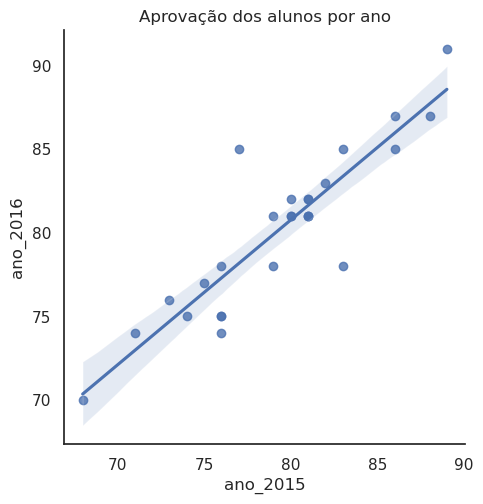

In [1040]:
exercícios_regressão_linear.gráfico_de_reta_linear(
    dataframe=df_alunos,
    x='ano_2015',
    y='ano_2016',
    titulo='Aprovação dos alunos por ano'
)

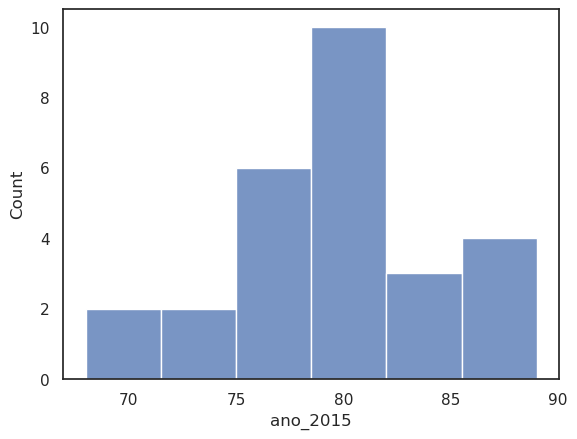

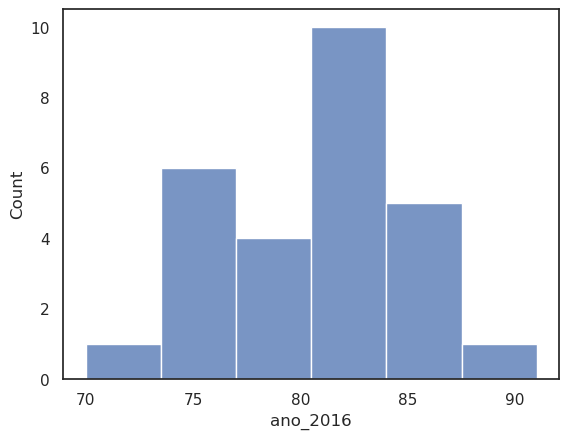

In [1041]:
for ano in ['ano_2015', 'ano_2016']:
    exercícios_regressão_linear.verificando_a_distribuição(dataframe=df_alunos, coluna=ano)

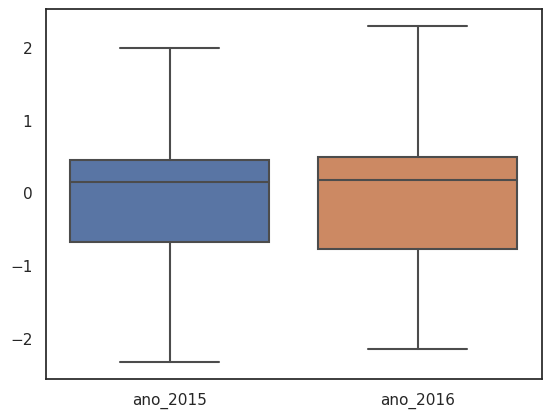

In [1042]:
exercícios_regressão_linear.identificando_outliers(dataframe=df_alunos)

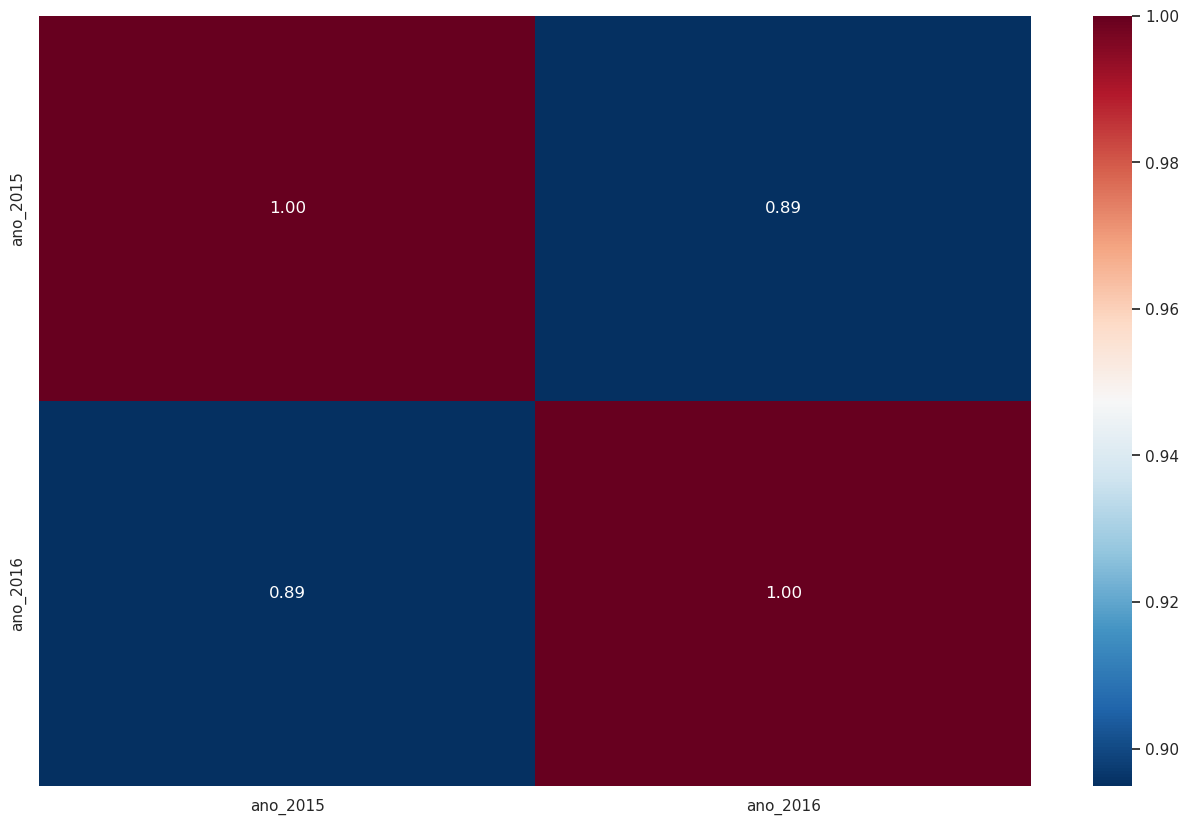

In [1043]:
exercícios_regressão_linear.gráfico_de_correlação(dataframe=df_alunos)

## Criação do modelo:

In [1044]:
x = df_alunos[['ano_2015']]
y = df_alunos['ano_2016']

treinamento_exercícios, y_pred, y_test = exercícios_regressão_linear.treinamento(
    x=x,
    y=y
)

r_quadrado: 0.920254651634064


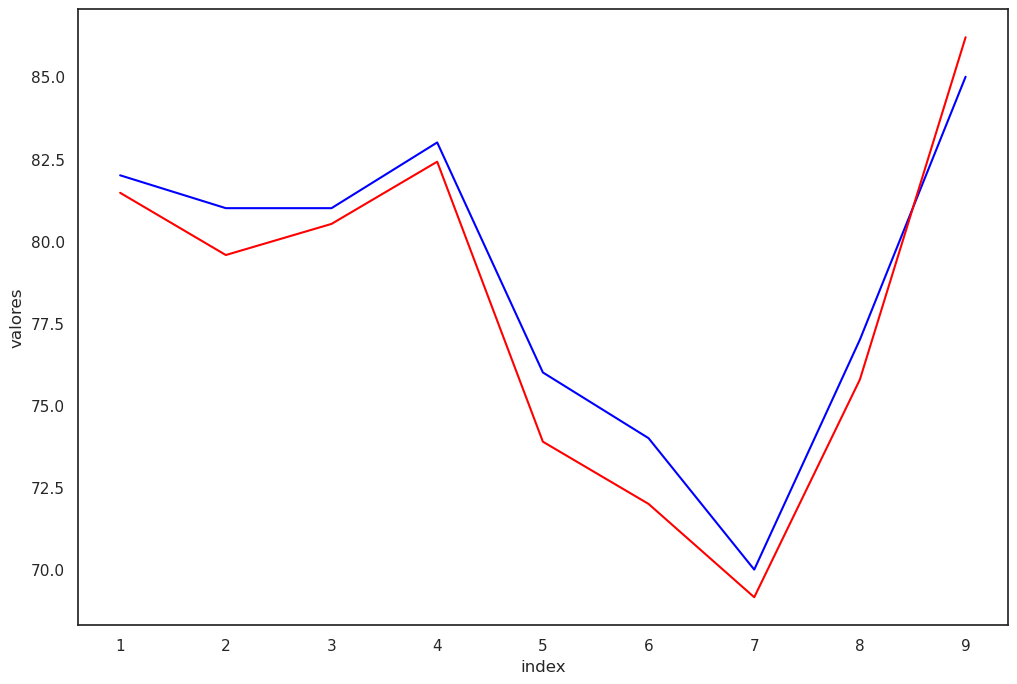

In [1045]:
exercícios_regressão_linear.gráfico_de_linha(
    y_pred=y_pred,
    y_true=y_test
)

In [1046]:
entrada = df_alunos[['ano_2015']]

df_alunos['predition_2016'] = exercícios_regressão_linear.previsão(
    treinamento=treinamento_exercícios,
    entrada=entrada
)

In [1047]:
entrada = df_alunos[['ano_2016']]

df_alunos['predition_2017'] = exercícios_regressão_linear.previsão(
    treinamento=treinamento_exercícios,
    entrada=entrada
)

/home/guerrlr0/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- ano_2016
Feature names seen at fit time, yet now missing:
- ano_2015

  warnings.warn(message, FutureWarning)


In [1048]:
df_alunos["residuo_2016"] = df_alunos["predition_2016"] - df_alunos["ano_2016"]

In [1049]:
df_alunos.head()

,UF,ano_2015,ano_2016,predition_2016,predition_2017,residuo_2016
0,Rondonia,77,85,77.680215,85.254790,-7.319785
1,Acre,79,81,79.573859,81.467502,-1.426141
2,Amazonas,83,85,83.361146,85.254790,-1.638854
3,Roraima,81,82,81.467502,82.414324,-0.532498
4,Para,73,76,73.892927,76.733393,-2.107073


## Regressão Linear Múltipla:

### Código:

In [1050]:
class RegressãoLinearMúltipla():
    def verificando_correlação(self, dataframe):
        dataframe = dataframe.corr()
        return dataframe
    
    def gráfico_de_correlação(self, dataframe):
        sns.pairplot(dataframe)
        plt.show()

    def modelo_mrls(self, dataframe, function):
        model = smf.ols(formula=function, data=dataframe).fit() 
        print(model.summary())

if __name__ == '__main__':
    regressão_linear_múltipla = RegressãoLinearMúltipla()

### Output:

In [1051]:
display(df_limite.head())

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial
0,70,10736,5214,400,500
1,68,5000,5000,380,600
2,44,5800,5800,500,800
3,72,4300,4300,2000,1000
4,75,4400,4400,3000,1000


In [1052]:
regressão_linear_múltipla.verificando_correlação(dataframe=df_limite)

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial
Idade,1.000000,0.066396,0.063227,0.064149,0.075883
RendimentoTotal,0.066396,1.000000,0.960551,0.031041,0.858120
Salario,0.063227,0.960551,1.000000,0.081792,0.888839
LimitedeCreditoImediato,0.064149,0.031041,0.081792,1.000000,0.226990
LimitedoChequeEspecial,0.075883,0.858120,0.888839,0.226990,1.000000


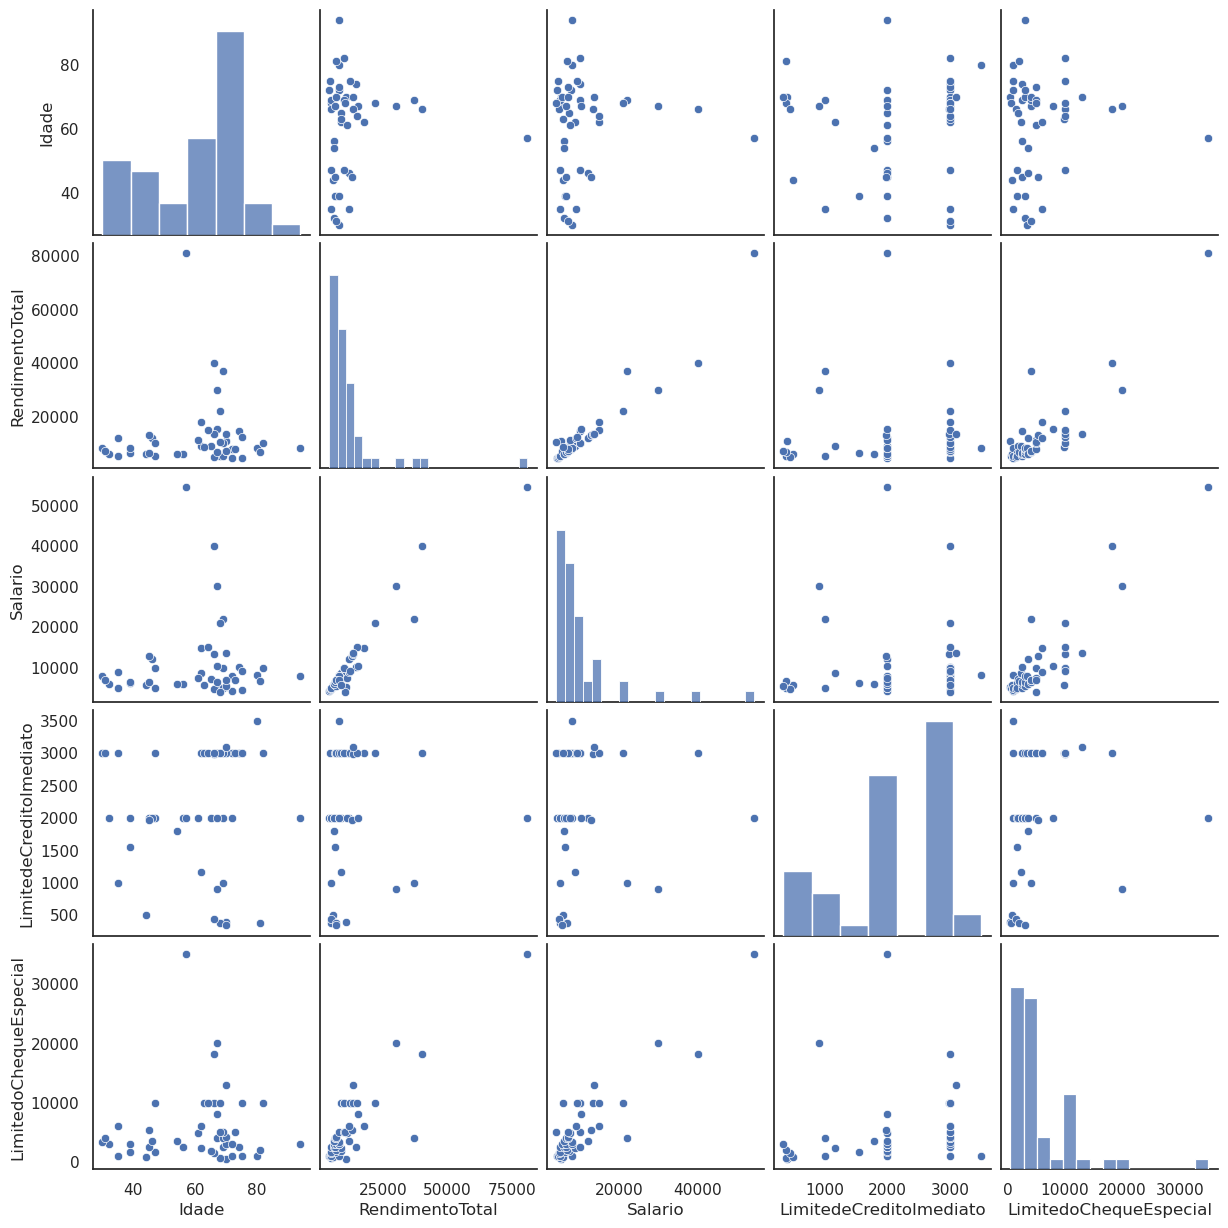

In [1053]:
regressão_linear_múltipla.gráfico_de_correlação(dataframe=df_limite)

In [1054]:
regressão_linear_múltipla.modelo_mrls(
    dataframe=df_limite,
    function='LimitedoChequeEspecial~Idade+RendimentoTotal+Salario+LimitedeCreditoImediato'
)

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.816
Model:                                OLS   Adj. R-squared:                  0.799
Method:                     Least Squares   F-statistic:                     47.65
Date:                    Fri, 09 Jun 2023   Prob (F-statistic):           2.92e-15
Time:                            12:02:07   Log-Likelihood:                -445.61
No. Observations:                      48   AIC:                             901.2
Df Residuals:                          43   BIC:                             910.6
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [1055]:
regressão_linear_múltipla.modelo_mrls(
    dataframe=df_limite,
    function='LimitedoChequeEspecial~RendimentoTotal+Salario+LimitedeCreditoImediato'
)

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.816
Model:                                OLS   Adj. R-squared:                  0.803
Method:                     Least Squares   F-statistic:                     64.97
Date:                    Fri, 09 Jun 2023   Prob (F-statistic):           3.34e-16
Time:                            12:02:07   Log-Likelihood:                -445.62
No. Observations:                      48   AIC:                             899.2
Df Residuals:                          44   BIC:                             906.7
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [1056]:
regressão_linear_múltipla.modelo_mrls(
    dataframe=df_limite,
    function='LimitedoChequeEspecial~Salario+LimitedeCreditoImediato'
)

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.814
Model:                                OLS   Adj. R-squared:                  0.806
Method:                     Least Squares   F-statistic:                     98.47
Date:                    Fri, 09 Jun 2023   Prob (F-statistic):           3.66e-17
Time:                            12:02:07   Log-Likelihood:                -445.86
No. Observations:                      48   AIC:                             897.7
Df Residuals:                          45   BIC:                             903.3
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

## Execício:

### Código:

In [1057]:
class ExercíciosRegressãoLinearMúltipla():
    def verificando_correlação(self, dataframe):
        dataframe = dataframe.corr()
        return dataframe
    
    def gráfico_de_correlação_pairplot(self, dataframe):
        sns.pairplot(dataframe)
        plt.show()

    def gráfico_de_correlação_heatmap(self, dataframe):
        sns.set(style='white')
        corr = dataframe.corr()
        plt.figure(figsize=(16, 10))
        sns.heatmap(corr, annot=True, cmap='RdBu_r', fmt='.2f', annot_kws={'size': 12})
        plt.show()

    def modelo_mrls(self, dataframe, function):
        model = smf.ols(formula=function, data=dataframe).fit() 
        print(model.summary())

if __name__ == '__main__':
    exercícios_regressão_linear_múltipla = ExercíciosRegressãoLinearMúltipla()

### Output:

In [1058]:
display(df_lucro.head())

,Investimento,Investimento_Mkt,Gastos_Administrativos,Lucro
0,0,45173,116984,14681
1,542,0,51743,35673
2,0,0,135427,42560
3,1315,297114,115816,49491
4,1000,1904,124153,64926


In [1059]:
exercícios_regressão_linear_múltipla.verificando_correlação(dataframe=df_lucro)

,Investimento,Investimento_Mkt,Gastos_Administrativos,Lucro
Investimento,1.000000,0.661913,0.243497,0.896767
Investimento_Mkt,0.661913,1.000000,-0.046715,0.716677
Gastos_Administrativos,0.243497,-0.046715,1.000000,0.200720
Lucro,0.896767,0.716677,0.200720,1.000000


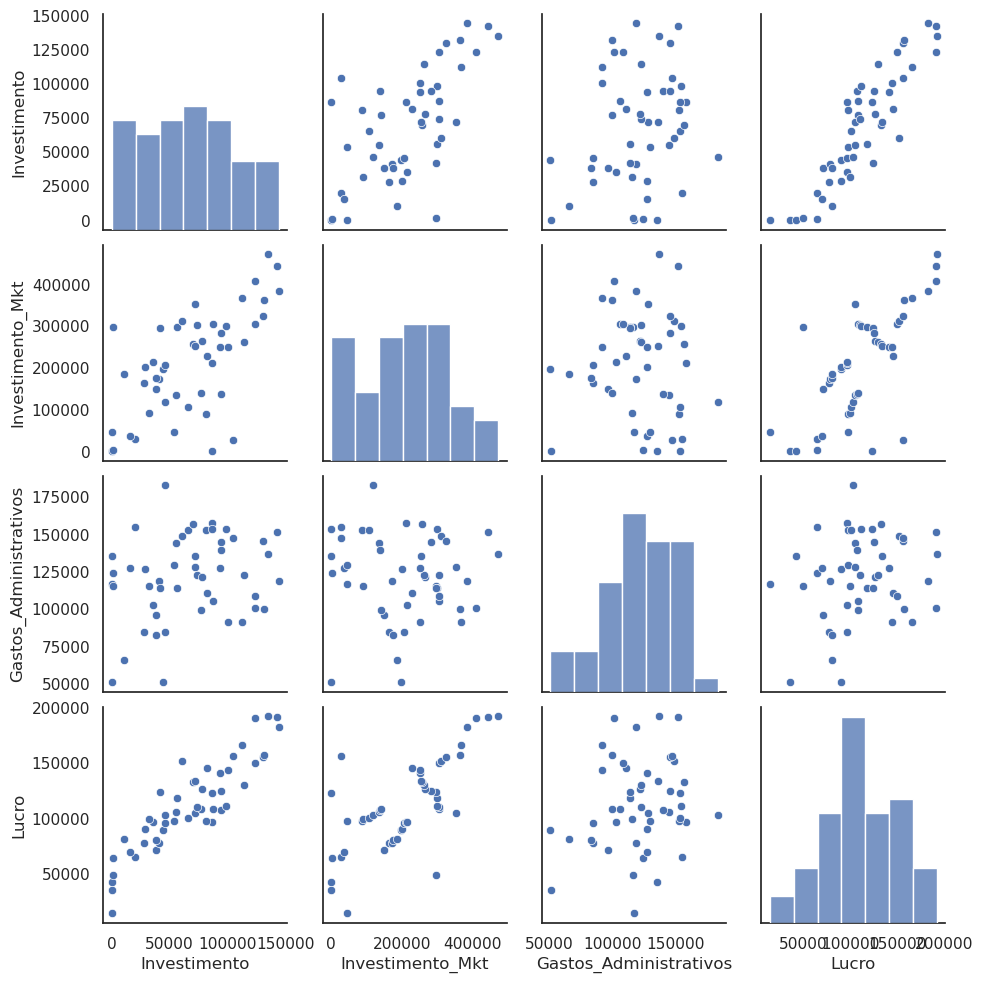

In [1060]:
exercícios_regressão_linear_múltipla.gráfico_de_correlação_pairplot(dataframe=df_lucro)

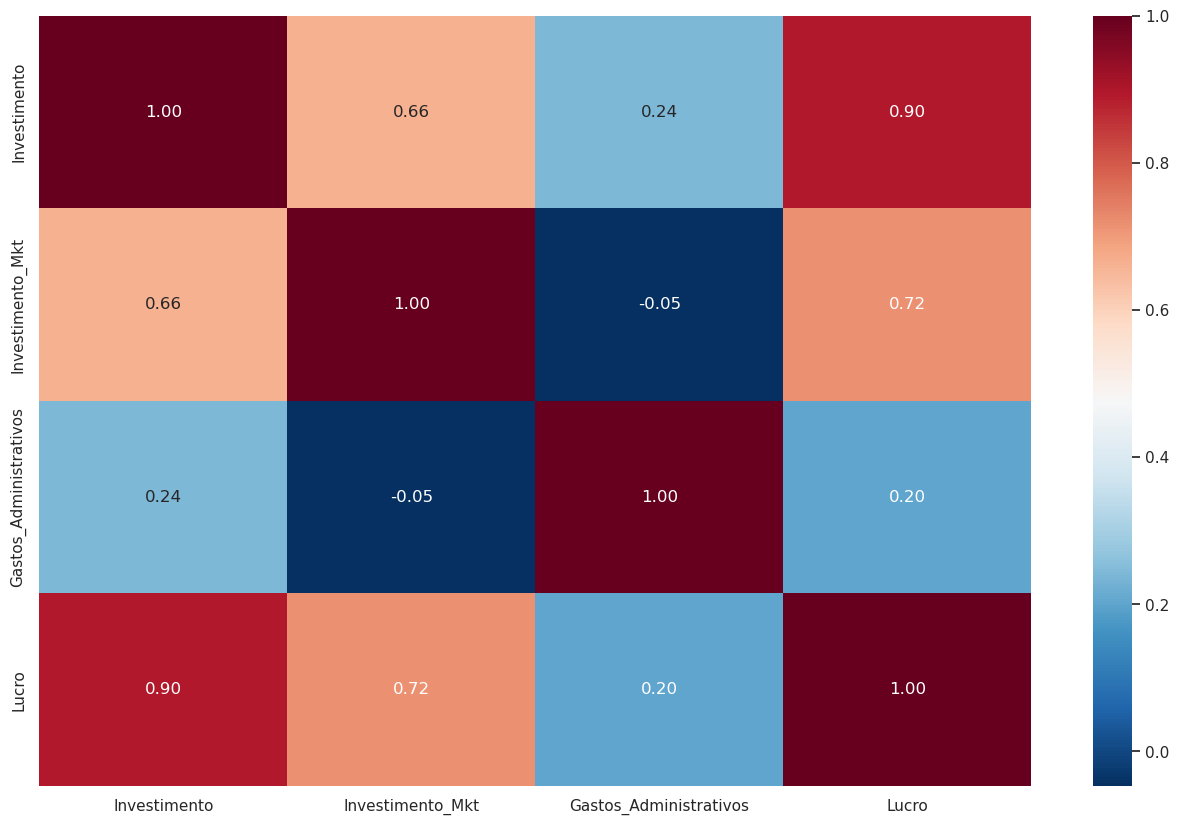

In [1061]:
exercícios_regressão_linear_múltipla.gráfico_de_correlação_heatmap(dataframe=df_lucro)

In [1062]:
df_lucro.columns

Index(['Investimento', 'Investimento_Mkt', 'Gastos_Administrativos', 'Lucro'], dtype='object')

In [1063]:
exercícios_regressão_linear_múltipla.modelo_mrls(
    function='Lucro~Investimento+Investimento_Mkt',
    dataframe=df_lucro
)

                            OLS Regression Results                            
Dep. Variable:                  Lucro   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     115.7
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           7.01e-19
Time:                        12:02:11   Log-Likelihood:                -556.18
No. Observations:                  50   AIC:                             1118.
Df Residuals:                      47   BIC:                             1124.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.758e+04   5004.534  

# Variáveis Dummy Prática:

### Código:

In [1064]:
class VariáveisDummyPrática():
    def dummy(self, dataframe, colunas=[]):
        dataframe = pd.get_dummies(dataframe, prefix=colunas)
        return dataframe

    def verificando_correlação(self, dataframe):
        dataframe = dataframe.corr()
        return dataframe
    
    def gráfico_de_correlação_pairplot(self, dataframe):
        sns.pairplot(dataframe)
        plt.show()

    def gráfico_de_correlação_heatmap(self, dataframe):
        sns.set(style='white')
        corr = dataframe.corr()
        plt.figure(figsize=(16, 10))
        sns.heatmap(corr, annot=True, cmap='RdBu_r', fmt='.2f', annot_kws={'size': 12})
        plt.show()

    def modelo_mrls(self, dataframe, function):
        model = smf.ols(formula=function, data=dataframe).fit() 
        print(model.summary())

if __name__ == '__main__':
    variáveis_dummy_prática = VariáveisDummyPrática()

### Output:

In [1065]:
display(df_escolaridade.head())

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial,Escolaridade
0,70,10736,5214,400,500,Fundamental_Medio
1,68,5000,5000,380,600,Fundamental_Medio
2,44,5800,5800,500,800,Fundamental_Medio
3,72,4300,4300,2000,1000,Fundamental_Medio
4,75,4400,4400,3000,1000,Fundamental_Medio


In [1066]:
df_escolaridade_dummy = variáveis_dummy_prática.dummy(dataframe=df_escolaridade, colunas=['Escolaridade'])

In [1067]:
variáveis_dummy_prática.verificando_correlação(dataframe=df_escolaridade_dummy)

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial,Escolaridade_Fundamental_Medio,Escolaridade_Superior_Pos
Idade,1.000000,0.066396,0.063227,0.064149,0.075883,-0.110892,0.110892
RendimentoTotal,0.066396,1.000000,0.960551,0.031041,0.858120,-0.396191,0.396191
Salario,0.063227,0.960551,1.000000,0.081792,0.888839,-0.475479,0.475479
LimitedeCreditoImediato,0.064149,0.031041,0.081792,1.000000,0.226990,-0.259433,0.259433
LimitedoChequeEspecial,0.075883,0.858120,0.888839,0.226990,1.000000,-0.598310,0.598310
Escolaridade_Fundamental_Medio,-0.110892,-0.396191,-0.475479,-0.259433,-0.598310,1.000000,-1.000000
Escolaridade_Superior_Pos,0.110892,0.396191,0.475479,0.259433,0.598310,-1.000000,1.000000


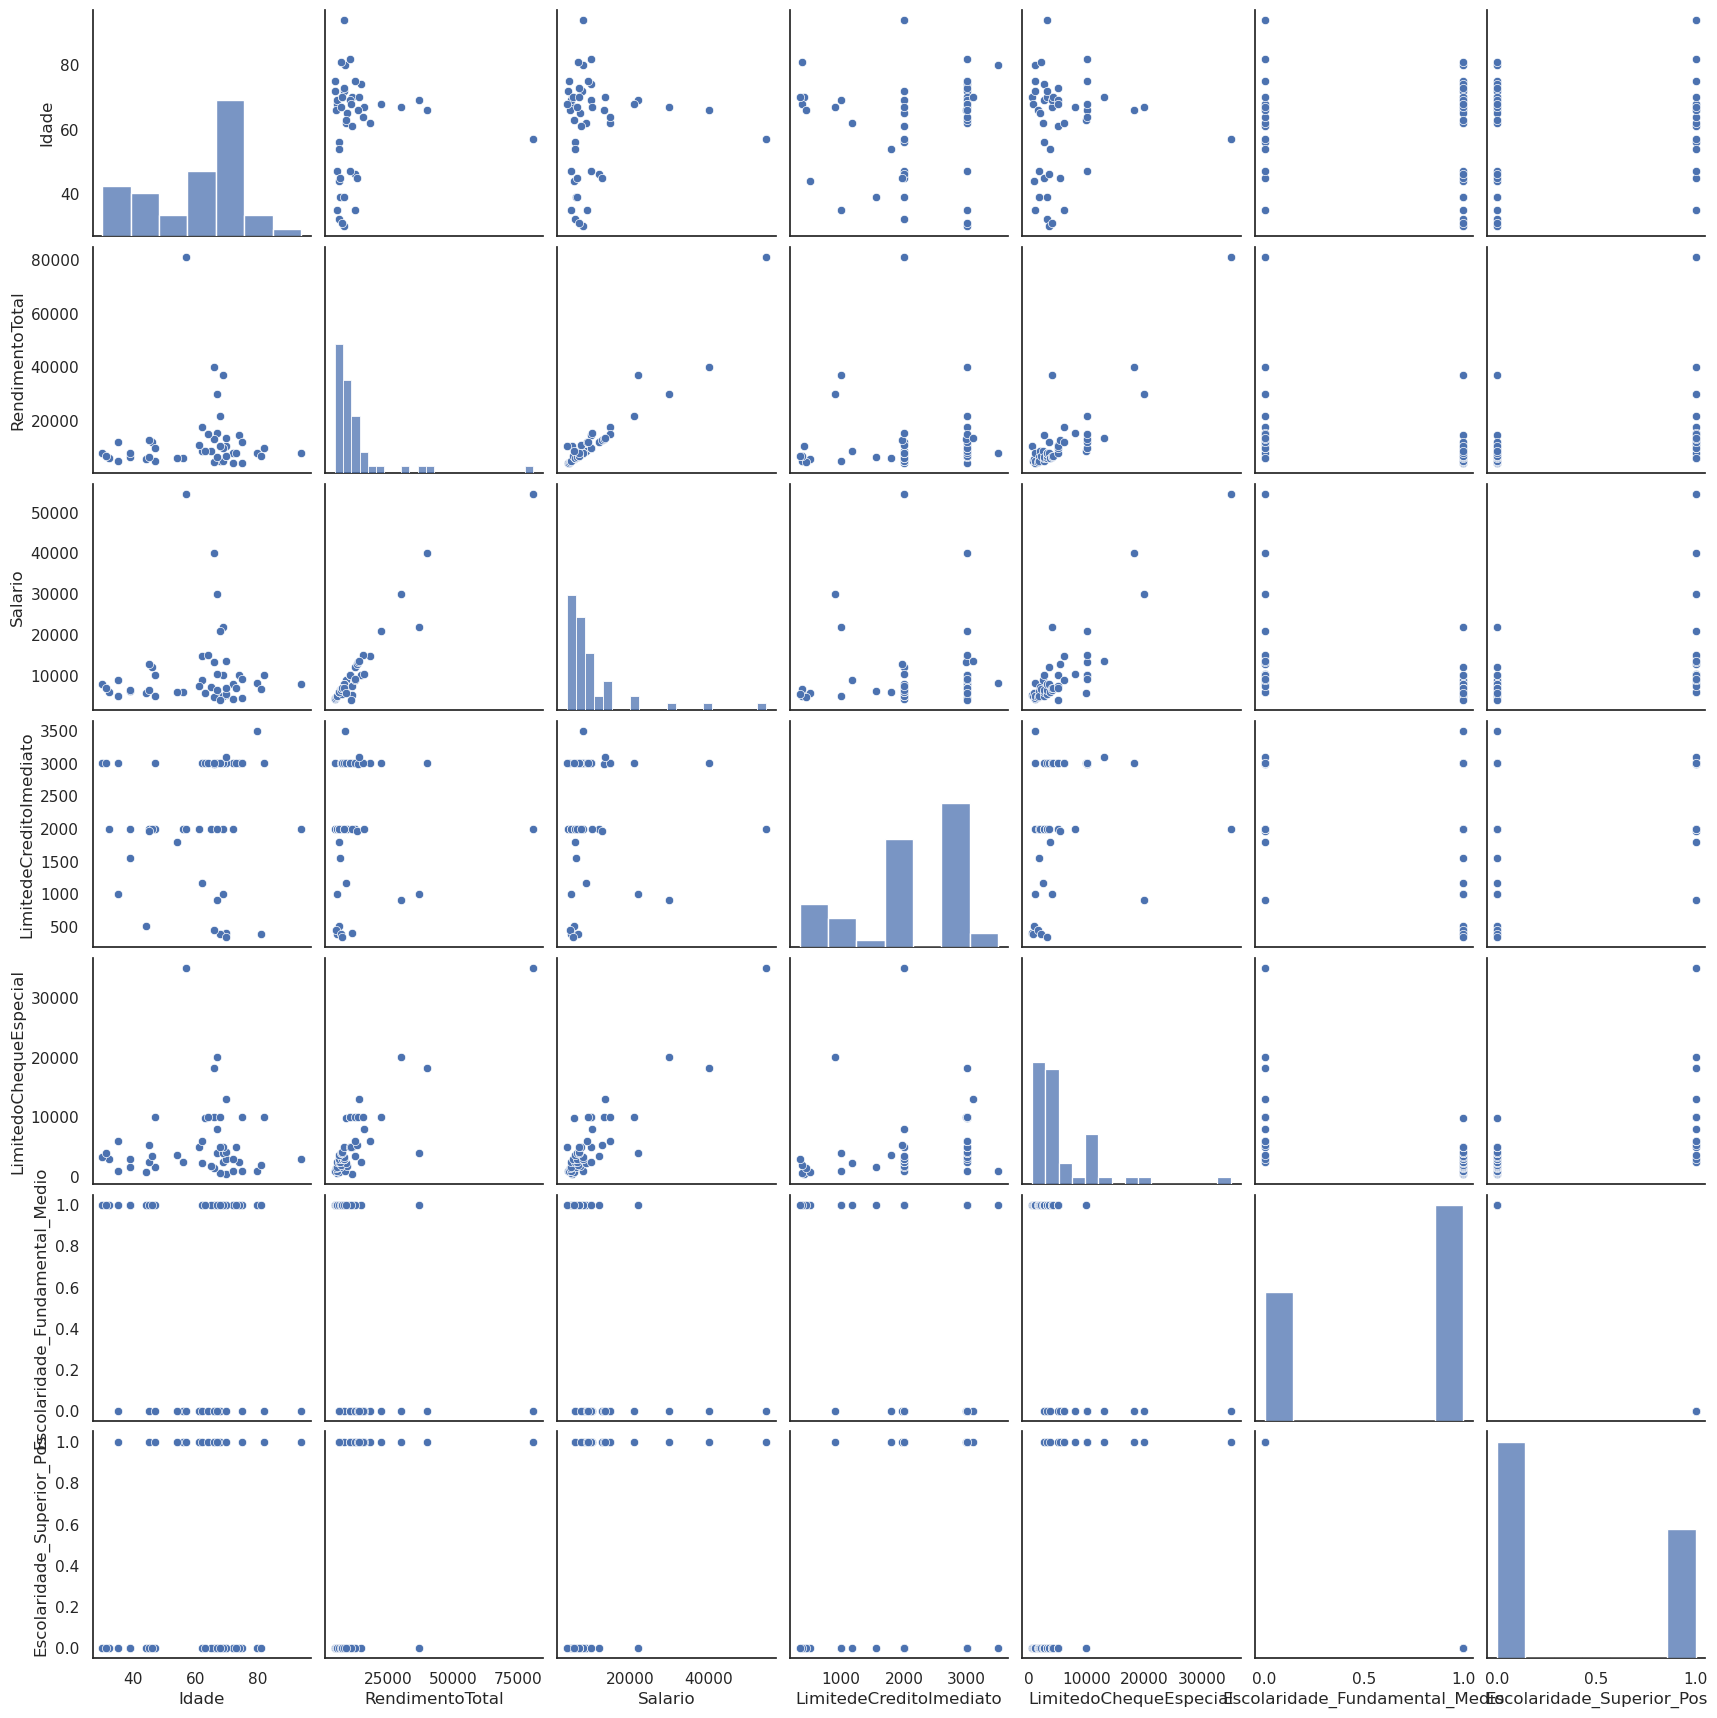

In [1068]:
variáveis_dummy_prática.gráfico_de_correlação_pairplot(dataframe=df_escolaridade_dummy)

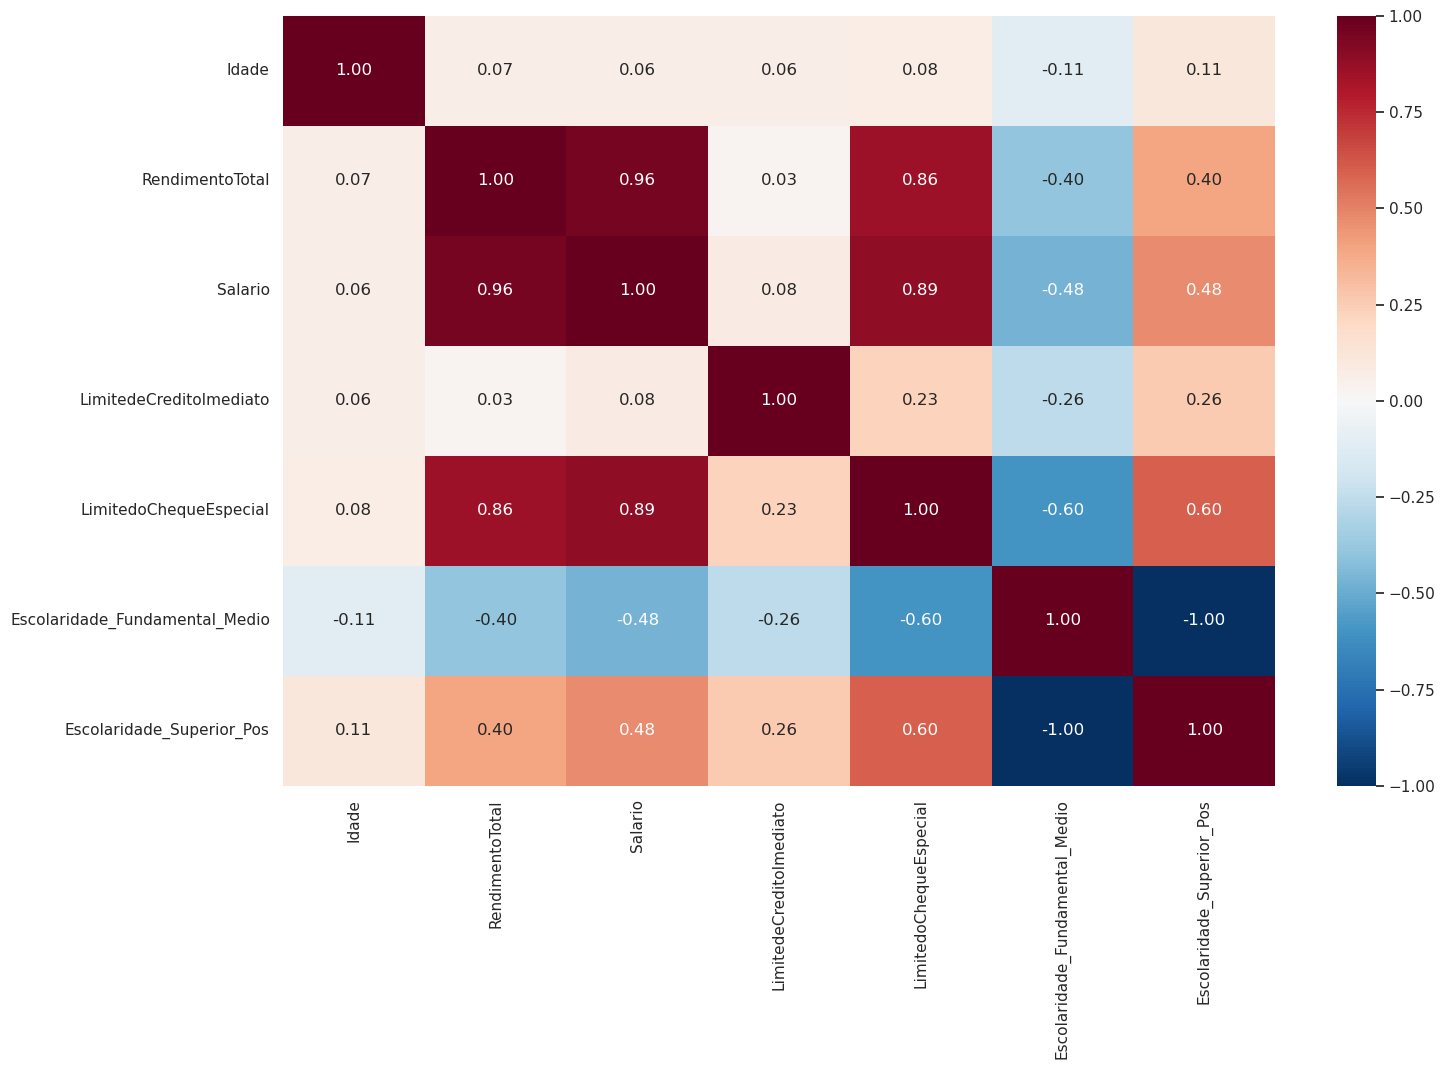

In [1069]:
variáveis_dummy_prática.gráfico_de_correlação_heatmap(dataframe=df_escolaridade_dummy)

In [1070]:
variáveis_dummy_prática.modelo_mrls(
    function='LimitedoChequeEspecial~Salario+LimitedeCreditoImediato+Escolaridade_Fundamental_Medio-1',
    dataframe=df_escolaridade_dummy
)

                                   OLS Regression Results                                  
Dep. Variable:     LimitedoChequeEspecial   R-squared (uncentered):                   0.915
Model:                                OLS   Adj. R-squared (uncentered):              0.909
Method:                     Least Squares   F-statistic:                              160.9
Date:                    Fri, 09 Jun 2023   Prob (F-statistic):                    4.57e-24
Time:                            12:02:19   Log-Likelihood:                         -442.01
No. Observations:                      48   AIC:                                      890.0
Df Residuals:                          45   BIC:                                      895.6
Df Model:                               3                                                  
Covariance Type:                nonrobust                                                  
                                     coef    std err          t      P>|t|      

## Execício:

### Código:

In [1071]:
class ExecícioVariáveisDummyPrática():
    def dummy(self, dataframe, colunas=[]):
        dataframe = pd.get_dummies(dataframe, prefix=colunas)
        return dataframe

    def verificando_correlação(self, dataframe):
        dataframe = dataframe.corr()
        return dataframe
    
    def gráfico_de_correlação_pairplot(self, dataframe):
        sns.pairplot(dataframe)
        plt.show()

    def gráfico_de_correlação_heatmap(self, dataframe):
        sns.set(style='white')
        corr = dataframe.corr()
        plt.figure(figsize=(16, 10))
        sns.heatmap(corr, annot=True, cmap='RdBu_r', fmt='.2f', annot_kws={'size': 12})
        plt.show()

    def modelo_mrls(self, dataframe, function):
        model = smf.ols(formula=function, data=dataframe).fit() 
        print(model.summary())

if __name__ == '__main__':
    execício_variáveis_dummy_prática = ExecícioVariáveisDummyPrática()

### Output:

In [1072]:
display(df_dummy.head())

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
0,70,10736,5214,400,Fundamental_Medio,RJ,F,500
1,68,5000,5000,380,Fundamental_Medio,RJ,F,600
2,44,5800,5800,500,Fundamental_Medio,RJ,F,800
3,72,4300,4300,2000,Fundamental_Medio,RJ,F,1000
4,75,4400,4400,3000,Fundamental_Medio,RJ,F,1000


In [1073]:
df_dummy = execício_variáveis_dummy_prática.dummy(
    dataframe=df_dummy,
    colunas=['Escolaridade', 'Gênero', 'Região']
)

In [1074]:
execício_variáveis_dummy_prática.verificando_correlação(dataframe=df_dummy)

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial,Escolaridade_Fundamental_Medio,Escolaridade_Superior_Pos,Gênero_RJ,Gênero_SP,Região_F,Região_M
Idade,1.000000,0.239445,0.213186,0.057183,0.228117,-0.150088,0.150088,-0.196052,0.196052,-0.121217,0.121217
RendimentoTotal,0.239445,1.000000,0.960551,0.031041,0.858120,-0.396191,0.396191,-0.177798,0.177798,-0.406241,0.406241
Salario,0.213186,0.960551,1.000000,0.081792,0.888839,-0.475479,0.475479,-0.242621,0.242621,-0.424335,0.424335
LimitedeCreditoImediato,0.057183,0.031041,0.081792,1.000000,0.226990,-0.259433,0.259433,-0.001145,0.001145,-0.473326,0.473326
LimitedoChequeEspecial,0.228117,0.858120,0.888839,0.226990,1.000000,-0.598310,0.598310,-0.312566,0.312566,-0.591779,0.591779
Escolaridade_Fundamental_Medio,-0.150088,-0.396191,-0.475479,-0.259433,-0.598310,1.000000,-1.000000,0.237508,-0.237508,0.602464,-0.602464
Escolaridade_Superior_Pos,0.150088,0.396191,0.475479,0.259433,0.598310,-1.000000,1.000000,-0.237508,0.237508,-0.602464,0.602464
Gênero_RJ,-0.196052,-0.177798,-0.242621,-0.001145,-0.312566,0.237508,-0.237508,1.000000,-1.000000,-0.167248,0.167248
Gênero_SP,0.196052,0.177798,0.242621,0.001145,0.312566,-0.237508,0.237508,-1.000000,1.000000,0.167248,-0.167248
Região_F,-0.121217,-0.406241,-0.424335,-0.473326,-0.591779,0.602464,-0.602464,-0.167248,0.167248,1.000000,-1.000000


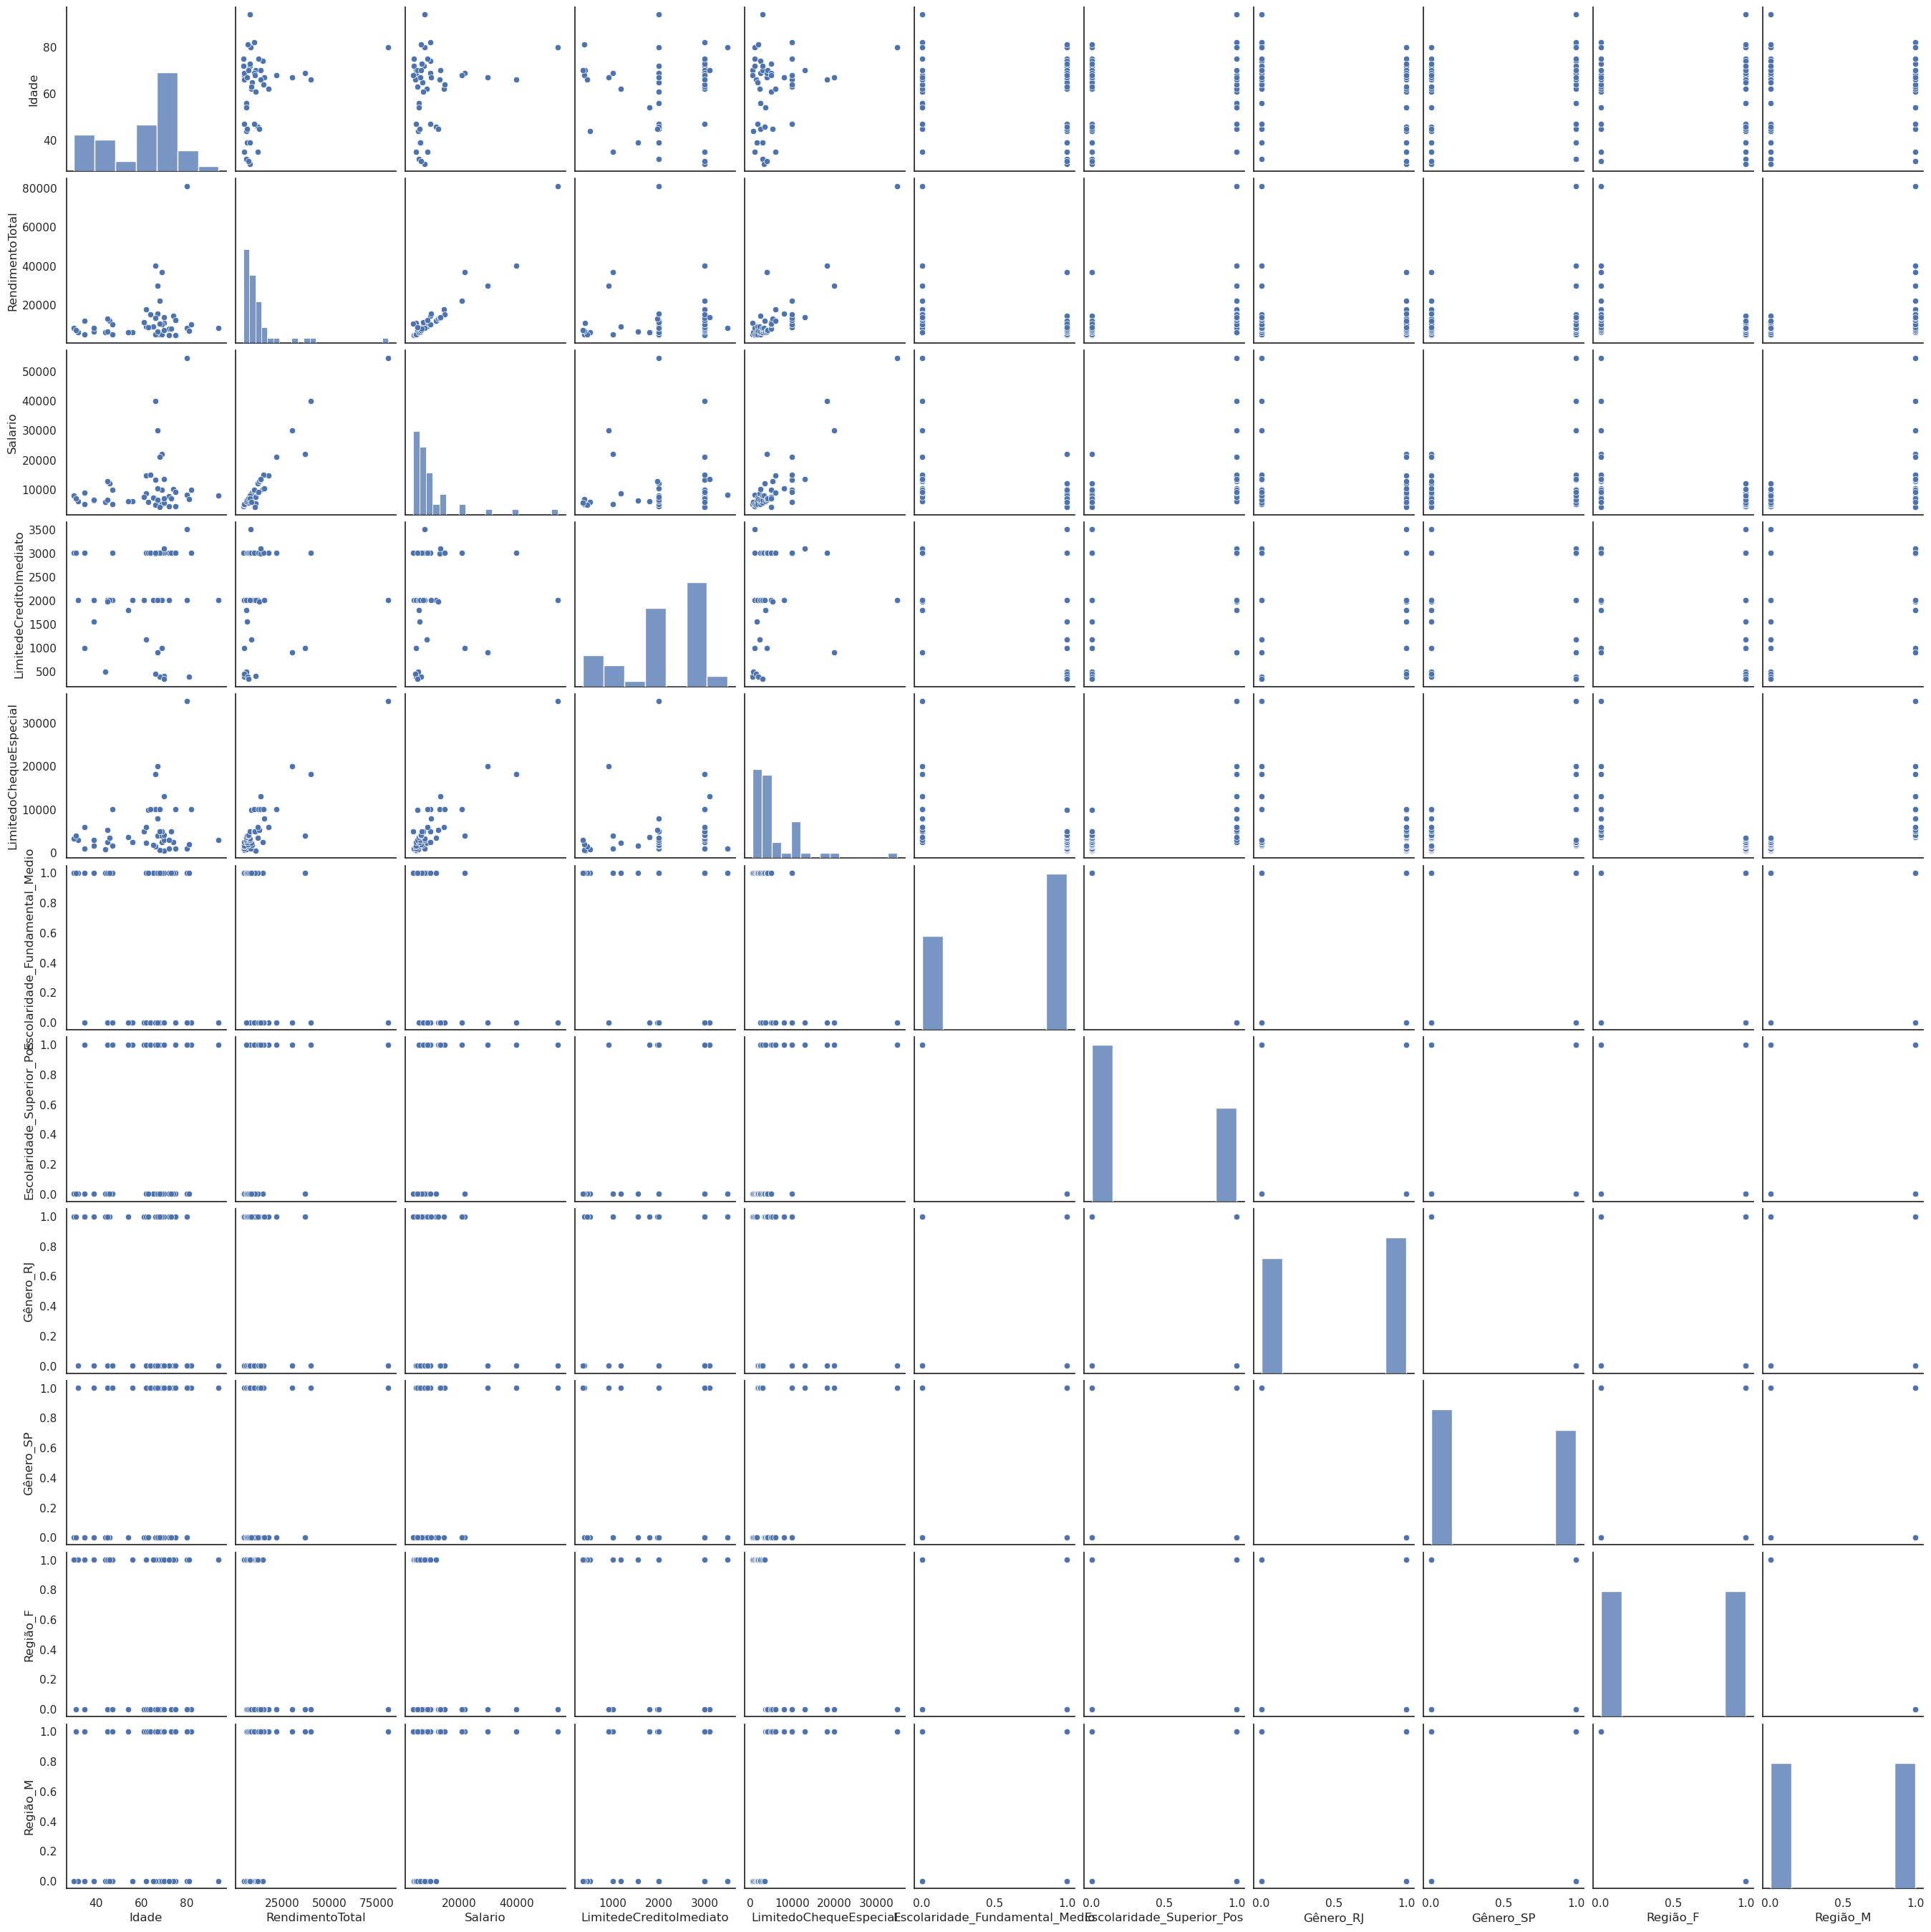

In [1075]:
execício_variáveis_dummy_prática.gráfico_de_correlação_pairplot(dataframe=df_dummy)

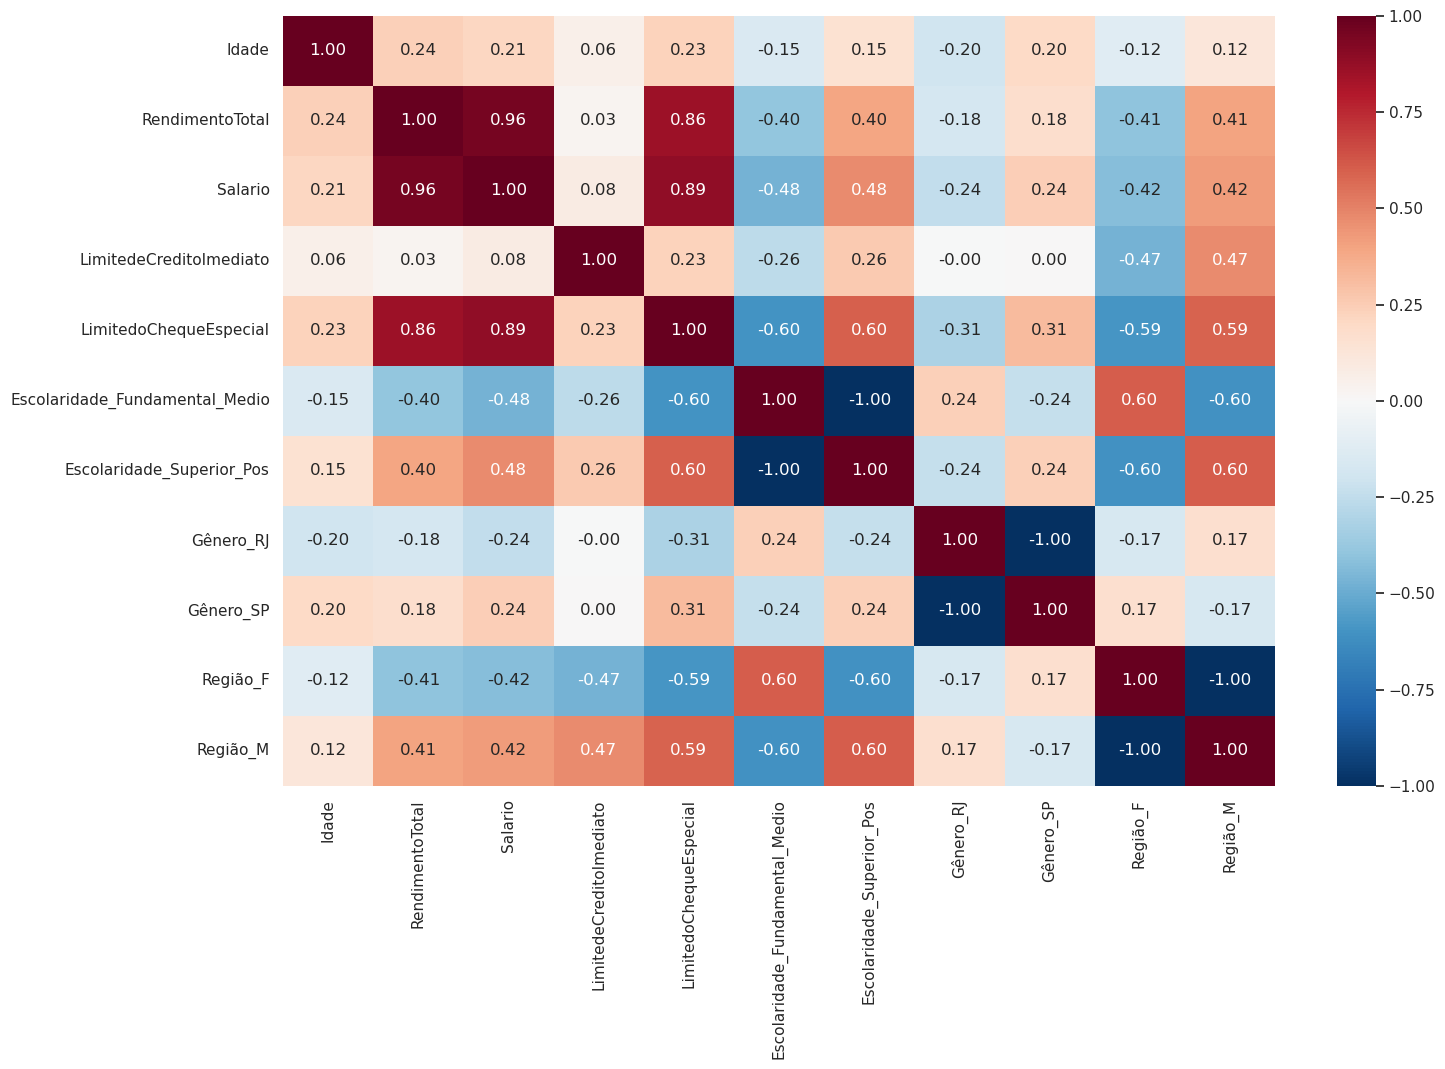

In [1076]:
execício_variáveis_dummy_prática.gráfico_de_correlação_heatmap(dataframe=df_dummy)

In [1077]:
df_dummy.columns

Index(['Idade', 'RendimentoTotal', 'Salario', 'LimitedeCreditoImediato',
       'LimitedoChequeEspecial', 'Escolaridade_Fundamental_Medio',
       'Escolaridade_Superior_Pos', 'Gênero_RJ', 'Gênero_SP', 'Região_F',
       'Região_M'],
      dtype='object')

In [1078]:
execício_variáveis_dummy_prática.modelo_mrls(
    function='LimitedoChequeEspecial~Salario+Gênero_RJ+Gênero_SP+Região_F+Região_M-1',
    dataframe=df_dummy
)

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.879
Model:                                OLS   Adj. R-squared:                  0.871
Method:                     Least Squares   F-statistic:                     106.7
Date:                    Fri, 09 Jun 2023   Prob (F-statistic):           3.24e-20
Time:                            12:02:39   Log-Likelihood:                -435.50
No. Observations:                      48   AIC:                             879.0
Df Residuals:                          44   BIC:                             886.5
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Salario     

# Regressão Linear simples com Scikit-Learn:

### Código:

In [1079]:
class RegressãoLinearComScikitLearn():
    def verificando_as_dimensões_do_dataframe(self, dataframe):
        dataframe = dataframe.shape
        print(f'Linhas: {dataframe[0]} \nColunas: {dataframe[1]}')

    def descrição(self, dataframe):
        dataframe = dataframe.describe().round(decimals=2)
        display(dataframe)

    def verificando_valores_nulos(self, dataframe):
        valores_nulos = dataframe.isnull().sum()
        percent_missing = (valores_nulos / len(dataframe))
        dataframe = pd.DataFrame(
            {
            'Quantidade': valores_nulos,
            'Porcentagem': percent_missing
            }
        )
        display(dataframe)

    def verificando_valores_duplicados(self, dataframe):
        valores_repetidos = dataframe.apply(lambda x: x.duplicated()).sum()
        percent_missing = (valores_repetidos / len(dataframe))
        dataframe = pd.DataFrame(
            {
                'Quantidade': valores_repetidos,
                'Porcentagem': percent_missing
            },
            index=dataframe.columns
        )

        dataframe = dataframe.style.format('{:.2%}', subset=['Porcentagem'])
        display(dataframe)
    
    def verificando_tipos(self, dataframe):
        dataframe = (
            dataframe.dtypes
            .to_frame('Tipos')
        )
        display(dataframe)

    def verificando_a_distribuição(self, dataframe, coluna):
        sns.histplot(data=dataframe[coluna], kde=True)

        plt.show()

    def identificando_outliers(self, dataframe):
        dataframe = dataframe.select_dtypes(include='number')
        dataframe = dataframe.apply(scale)
        sns.boxplot(data=dataframe)
        plt.show()

    def gráfico_de_reta_linear(self, dataframe, x, y):
        sns.lmplot(
            data=dataframe, 
            x=x,
            y=y
        )
        ax = plt.gca()
        ax.set_title("Reta de Regressão - Tempo x Venda")
        plt.show()

    def verificando_correlação(self, dataframe):
        dataframe = dataframe.corr()
        return dataframe
    
    def gráfico_de_correlação_pairplot(self, dataframe):
        sns.pairplot(dataframe)
        plt.show()

    def gráfico_de_correlação_heatmap(self, dataframe):
        sns.set(style='white')
        corr = dataframe.corr()
        plt.figure(figsize=(16, 10))
        sns.heatmap(corr, annot=True, cmap='RdBu_r', fmt='.2f', annot_kws={'size': 12})
        plt.show()

    def dummy(self, dataframe, colunas=[]):
        dataframe = pd.get_dummies(dataframe, prefix=colunas)
        return dataframe
    
    def normalizando_os_dados(self, dataframe):
        scaler = StandardScaler()
        dataframe = pd.DataFrame(
            scaler.fit_transform(dataframe), 
            index=dataframe.index, 
            columns=dataframe.columns
        )
        return dataframe

    def modelo_mrls(self, dataframe, function):
        model = smf.ols(formula=function, data=dataframe).fit() 
        print(model.summary())

    def treinamento(self, dataframe, x, y):
        x_train, x_test, y_train, y_test = train_test_split(
            dataframe[[x]],
            dataframe[y],
            train_size=0.7,
            test_size=0.3,
            random_state=46
        )

        ln = LinearRegression()
        treinamento = ln.fit(x_train, y_train)

        y_pred = ln.predict(x_test)

        r2 = r2_score(y_true=y_test, y_pred=y_pred)

        print(f'Coeficiente de Determinação (R²): {r2}')

        return treinamento, y_pred, y_test
    
    def metricas_do_modelo(self, y_true, y_pred):
        print('MAE:', metrics.mean_absolute_error(y_true, y_pred))
        print('MSE:', metrics.mean_squared_error(y_true, y_pred))
        print('RMSE:', np.sqrt(metrics.mean_squared_error(y_true, y_pred)))

    def gráfico_de_linha(self, y_true, y_pred):
        index = [i for i in range(1, len(y_pred)+1, 1)]

        fig = plt.figure(figsize=(12, 8))
        plt.plot(index, y_true, color='blue')
        plt.plot(index, y_pred, color='red')
        plt.xlabel('index')
        plt.ylabel('valores')
        plt.show()

    

if __name__ == '__main__':
    regressão_linear_com_scikit_learn = RegressãoLinearComScikitLearn()

### Output:

In [1080]:
display(df_imoveis.head())

,area,preco
0,359.87,25000
1,353.12,45000
2,341.89,45000
3,435.99,20000
4,341.77,25000


In [1081]:
df_imoveis.columns

Index(['area', 'preco'], dtype='object')

In [1082]:
regressão_linear_com_scikit_learn.verificando_as_dimensões_do_dataframe(dataframe=df_imoveis)

Linhas: 54 
Colunas: 2


In [1083]:
regressão_linear_com_scikit_learn.descrição(dataframe=df_imoveis)

,area,preco
count,54.00,54.00
mean,457.48,41296.30
std,261.53,16488.57
min,293.22,20000.00
25%,355.09,30000.00
50%,380.36,40000.00
75%,470.09,50000.00
max,2057.57,120000.00


In [1084]:
regressão_linear_com_scikit_learn.verificando_tipos(dataframe=df_imoveis)

,Tipos
area,float64
preco,int64


In [1085]:
regressão_linear_com_scikit_learn.verificando_valores_nulos(dataframe=df_imoveis)

,Quantidade,Porcentagem
area,0,0.0
preco,0,0.0


In [1086]:
regressão_linear_com_scikit_learn.verificando_valores_duplicados(dataframe=df_imoveis)

,Quantidade,Porcentagem
area,0,0.00%
preco,43,79.63%


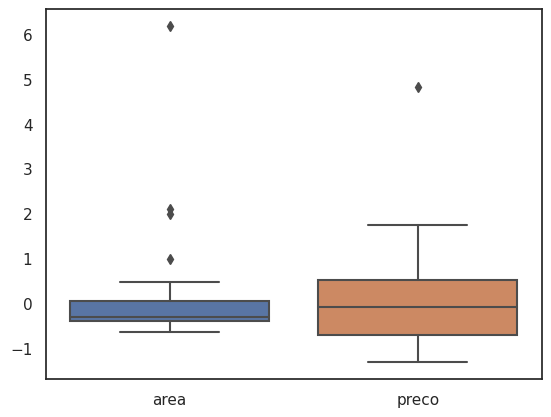

In [1087]:
regressão_linear_com_scikit_learn.identificando_outliers(dataframe=df_imoveis)

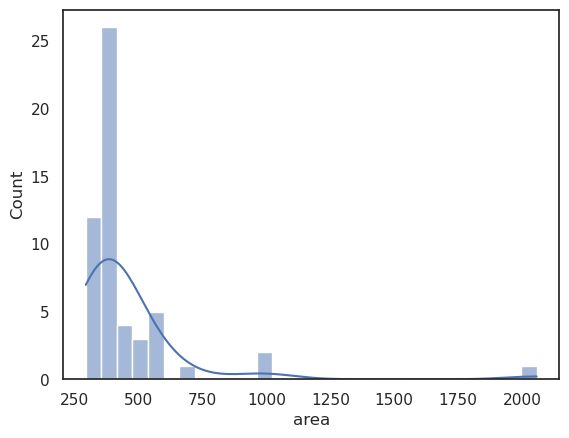

In [1088]:
regressão_linear_com_scikit_learn.verificando_a_distribuição(dataframe=df_imoveis, coluna='area')

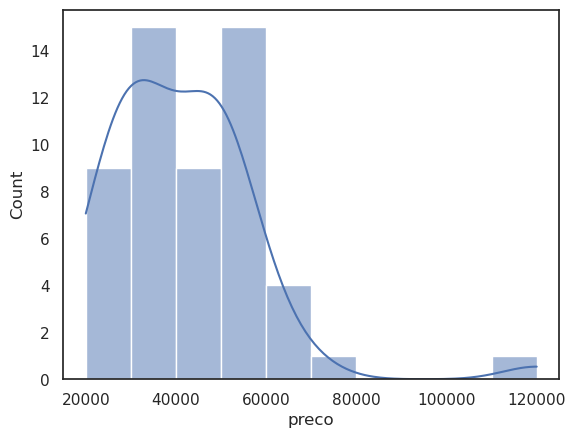

In [1089]:
regressão_linear_com_scikit_learn.verificando_a_distribuição(dataframe=df_imoveis, coluna='preco')

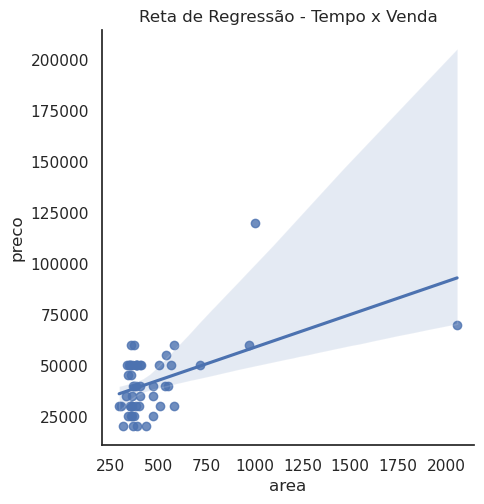

In [1090]:
regressão_linear_com_scikit_learn.gráfico_de_reta_linear(dataframe=df_imoveis, x='area', y='preco')

In [1091]:
regressão_linear_com_scikit_learn.verificando_correlação(dataframe=df_imoveis)

,area,preco
area,1.000000,0.511373
preco,0.511373,1.000000


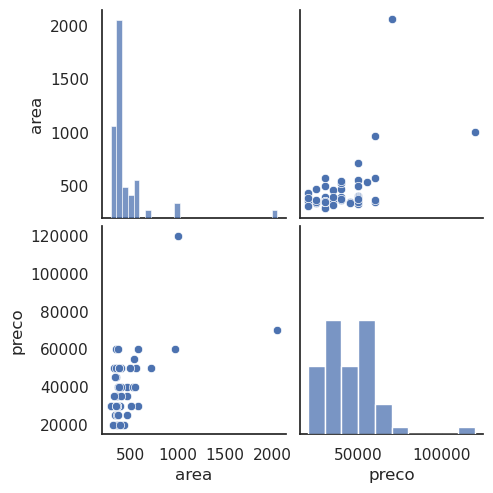

In [1092]:
regressão_linear_com_scikit_learn.gráfico_de_correlação_pairplot(dataframe=df_imoveis)

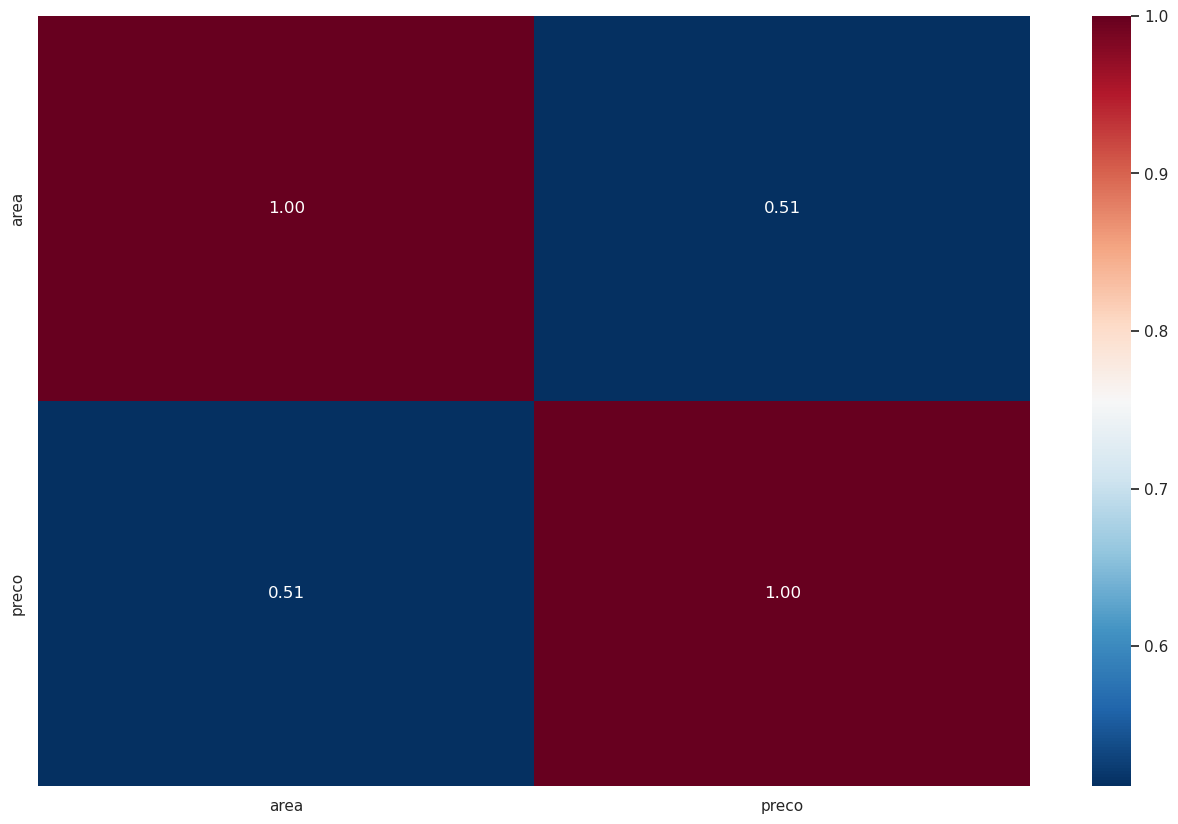

In [1093]:
regressão_linear_com_scikit_learn.gráfico_de_correlação_heatmap(dataframe=df_imoveis)

In [1094]:
df_imoveis_normalizando = regressão_linear_com_scikit_learn.normalizando_os_dados(dataframe=df_imoveis)

In [1095]:
regressão_linear_com_scikit_learn.modelo_mrls(
    function = 'preco~area-1',
    dataframe=df_imoveis_normalizando
)

                                 OLS Regression Results                                
Dep. Variable:                  preco   R-squared (uncentered):                   0.262
Model:                            OLS   Adj. R-squared (uncentered):              0.248
Method:                 Least Squares   F-statistic:                              18.77
Date:                Fri, 09 Jun 2023   Prob (F-statistic):                    6.61e-05
Time:                        12:02:43   Log-Likelihood:                         -68.438
No. Observations:                  54   AIC:                                      138.9
Df Residuals:                      53   BIC:                                      140.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [1096]:
treinamento, y_pred, y_test = regressão_linear_com_scikit_learn.treinamento(
    dataframe= df_imoveis_normalizando,
    x='preco',
    y='area'
)

Coeficiente de Determinação (R²): 0.26489872938383896


In [1097]:
regressão_linear_com_scikit_learn.metricas_do_modelo(
    y_true=y_test,
    y_pred=y_pred
)

MAE: 0.4478669714243303
MSE: 0.31018974108203007
RMSE: 0.5569468027397501


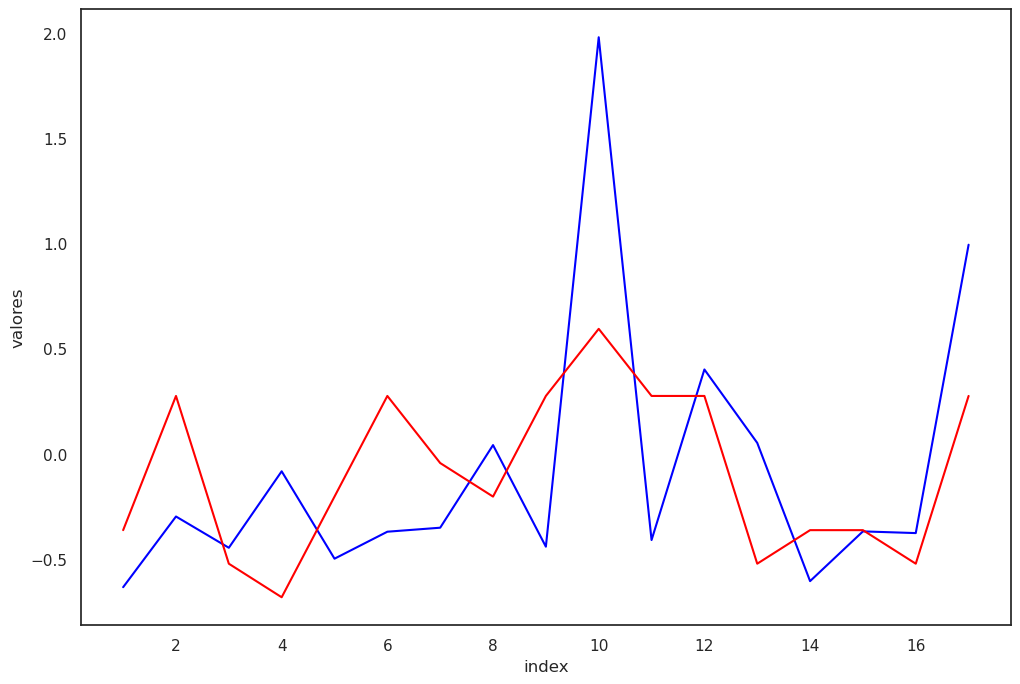

In [1098]:
regressão_linear_com_scikit_learn.gráfico_de_linha(
    y_true=y_test,
    y_pred=y_pred
)

## Execício:

### Código:

In [1099]:
class ExercíciosRegressãoLinearComScikitLearn():
    def normalizando_os_dados(self, dataframe):
        scaler = StandardScaler()
        dataframe = pd.DataFrame(
            scaler.fit_transform(dataframe), 
            index=dataframe.index, 
            columns=dataframe.columns
        )
        return dataframe
    # Modeling:
    def treinamento(self, dataframe, x, y):
        x_train, x_test, y_train, y_test = train_test_split(
            dataframe[[x]],
            dataframe[y],
            train_size=0.7,
            test_size=0.3,
            random_state=46
        )

        ln = LinearRegression()
        treinamento = ln.fit(x_train, y_train)

        y_pred = ln.predict(x_test)

        r2 = r2_score(y_true=y_test, y_pred=y_pred)

        print(f'r_quadrado: {r2}')

        return treinamento, y_pred, y_test
    
    def gráfico_de_linha(self, y_true, y_pred):
        index = [i for i in range(1, len(y_pred)+1, 1)]

        fig = plt.figure(figsize=(12, 8))
        plt.plot(index, y_true, color='blue')
        plt.plot(index, y_pred, color='red')
        plt.xlabel('index')
        plt.ylabel('valores')
        plt.show()

    def previsão(self, treinamento, entrada):
        y_pred = treinamento.predict(entrada)
        print(y_pred)
        return y_pred

    def resumo_do_modelo(self, modelo):
        print(modelo.summary())

if __name__ == '__main__':
    exercícios_regressão_linear_com_scikit_learn = ExercíciosRegressãoLinearComScikitLearn()

In [1100]:
display(df_aprovados.head())

,ano_2015,ano_2016
0,77,85
1,79,81
2,83,85
3,81,82
4,73,76


In [1101]:
df_aprovados_normalizado = exercícios_regressão_linear_com_scikit_learn.normalizando_os_dados(
    dataframe=df_aprovados
)

In [1102]:
treinamento, y_pred, y_test = exercícios_regressão_linear_com_scikit_learn.treinamento(
    dataframe= df_aprovados_normalizado,
    x='ano_2015',
    y='ano_2016'
)

r_quadrado: 0.9202546516340642


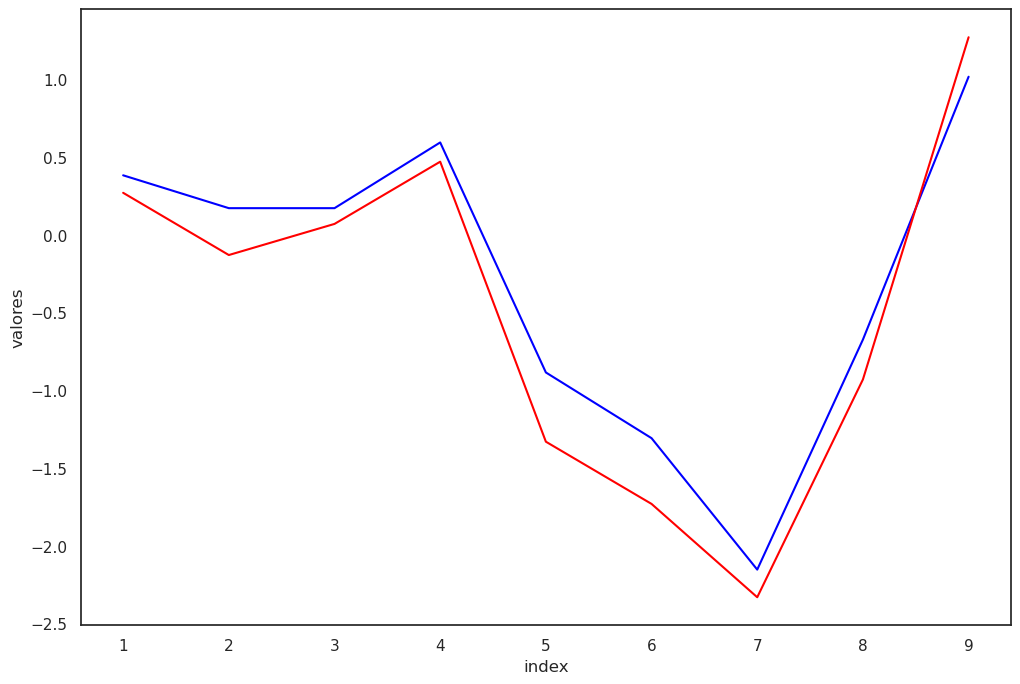

In [1103]:
exercícios_regressão_linear_com_scikit_learn.gráfico_de_linha(
    y_true=y_test,
    y_pred=y_pred
)

In [1104]:
# exercícios_regressão_linear_com_scikit_learn.previsão
# exercícios_regressão_linear_com_scikit_learn.resumo_do_modelo

# Regressão Linear Múltipla com Scikit-Learn:

### Código:

In [1105]:
class RegressãoLinearMúltiplaComScikitLearn():
    def descrição(self, dataframe):
        dataframe = dataframe.describe().round(decimals=2)
        display(dataframe)

    def gráfico_de_distribuição(self, dataframe, coluna):
        sns.histplot(data=dataframe[coluna], kde=True)

        plt.show()

    #Preparação dos dados:
    def dummy(self, dataframe, colunas=[]):
        dataframe = pd.get_dummies(dataframe, prefix=colunas)
        return dataframe

    def normalizando_os_dados(self, dataframe):
        scaler = StandardScaler()
        dataframe = pd.DataFrame(
            scaler.fit_transform(dataframe), 
            index=dataframe.index, 
            columns=dataframe.columns
        )
        return dataframe

    # Modelagem:
    def modelo_mrls(self, dataframe, function):
        model = smf.ols(formula=function, data=dataframe).fit() 
        print(model.summary())

    def treinamento(self, dataframe, x, y):
        x_train, x_test, y_train, y_test = train_test_split(
            dataframe[x],
            dataframe[y],
            train_size=0.7,
            test_size=0.3,
            random_state=42
        )

        ln = LinearRegression()
        treinamento = ln.fit(x_train, y_train)

        y_pred = ln.predict(x_test)

        r2 = r2_score(y_true=y_test, y_pred=y_pred)

        print(f'Coeficiente de Determinação (R²): {r2}')

        return treinamento, y_pred, y_test
    
    def metricas_do_modelo(self, y_true, y_pred):
        print('MAE:', metrics.mean_absolute_error(y_true, y_pred))
        print('MSE:', metrics.mean_squared_error(y_true, y_pred))
        print('RMSE:', np.sqrt(metrics.mean_squared_error(y_true, y_pred)))

    # Data Visualisation:
    def gráfico_de_reta_linear(self, dataframe, x, y):
        sns.lmplot(
            data=dataframe, 
            x=x,
            y=y
        )
        ax = plt.gca()
        ax.set_title("Reta de Regressão - Tempo x Venda")
        plt.show()

    def gráfico_de_linha_plot(self, y_true, y_pred):
        index = [i for i in range(1, len(y_pred)+1, 1)]

        fig = plt.figure(figsize=(12, 8))
        plt.plot(index, y_true, color='blue')
        plt.plot(index, y_pred, color='red')
        plt.xlabel('index')
        plt.ylabel('valores')
        plt.show()


if __name__ == '__main__':
    regressão_linear_mútipla_com_scikit_learn = RegressãoLinearMúltiplaComScikitLearn()

### Output:

In [1106]:
display(df_limiti_dummy.head())

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
0,70,10736,5214,400,Fundamental_Medio,RJ,F,500
1,68,5000,5000,380,Fundamental_Medio,RJ,F,600
2,44,5800,5800,500,Fundamental_Medio,RJ,F,800
3,72,4300,4300,2000,Fundamental_Medio,RJ,F,1000
4,75,4400,4400,3000,Fundamental_Medio,RJ,F,1000


In [1107]:
df_limiti_dummy.columns

Index(['Idade', 'RendimentoTotal', 'Salario', 'LimitedeCreditoImediato',
       'Escolaridade', 'Gênero', 'Região', 'LimitedoChequeEspecial'],
      dtype='object')

In [1108]:
regressão_linear_mútipla_com_scikit_learn.descrição(dataframe=df_limiti_dummy)

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial
count,48.00,48.00,48.00,48.00,48.00
mean,61.46,12275.08,10507.12,2175.21,5620.73
std,15.28,12640.65,9332.17,938.09,6131.90
min,30.00,4300.00,4027.00,340.00,500.00
25%,47.00,6380.00,5950.00,1925.00,2262.50
50%,66.50,8400.00,7400.00,2000.00,3550.00
75%,70.00,12378.25,10163.00,3000.00,6500.00
max,94.00,81000.00,54500.00,3500.00,35000.00


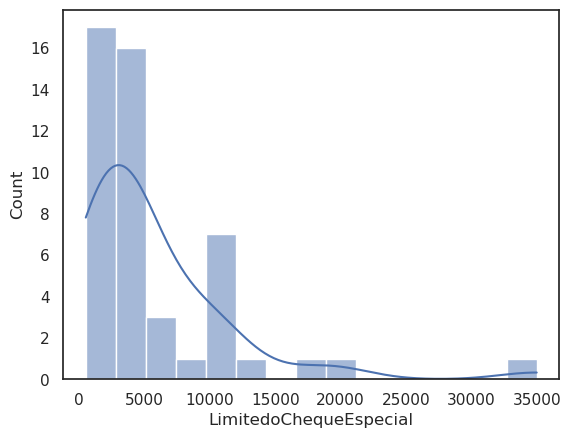

In [1109]:
regressão_linear_mútipla_com_scikit_learn.gráfico_de_distribuição(
    dataframe=df_limiti_dummy, 
    coluna='LimitedoChequeEspecial'
)

In [1110]:
colunas = ['Escolaridade', 'Gênero', 'Região']
df_limiti_dummy = regressão_linear_mútipla_com_scikit_learn.dummy(
    dataframe=df_limiti_dummy, 
    colunas=colunas
)

In [1111]:
df_limiti_dummy = regressão_linear_mútipla_com_scikit_learn.normalizando_os_dados(
    dataframe=df_limiti_dummy
)

In [1112]:
regressão_linear_mútipla_com_scikit_learn.modelo_mrls(
    dataframe=df_limiti_dummy,
    function = 'LimitedoChequeEspecial~Salario+Gênero_RJ+Gênero_SP+Região_F+Região_M-1'
)

                                   OLS Regression Results                                  
Dep. Variable:     LimitedoChequeEspecial   R-squared (uncentered):                   0.879
Model:                                OLS   Adj. R-squared (uncentered):              0.871
Method:                     Least Squares   F-statistic:                              109.2
Date:                    Fri, 09 Jun 2023   Prob (F-statistic):                    1.14e-20
Time:                            12:02:45   Log-Likelihood:                         -17.385
No. Observations:                      48   AIC:                                      40.77
Df Residuals:                          45   BIC:                                      46.38
Df Model:                               3                                                  
Covariance Type:                nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-

In [1113]:
treinamento, y_pred, y_test = regressão_linear_mútipla_com_scikit_learn.treinamento(
    dataframe=df_limiti_dummy,
    x=['Salario', 'Gênero_RJ', 'Gênero_SP', 'Região_F', 'Região_M'],
    y=['LimitedoChequeEspecial'],
)

Coeficiente de Determinação (R²): 0.20868827609366936


In [1114]:
regressão_linear_mútipla_com_scikit_learn.metricas_do_modelo(
    y_pred=y_pred,
    y_true=y_test
)

MAE: 0.34764291534355146
MSE: 0.24819485018090884
RMSE: 0.49819157979727924


# Regressão Não Linear:

### Código:

In [1115]:
class RegressãoNãoLinear():
    # Data Undeinstand:
    def descrição(self, dataframe):
        dataframe = dataframe.describe().round(decimals=2)
        display(dataframe)

    def verificando_correlação(self, dataframe):
        dataframe = dataframe.corr()
        return dataframe
    
    # Data Preparation:
    def dummy(self, dataframe):
        return pd.get_dummies(dataframe)
    
    # Modelagem:
    def modelo_mrls(self, dataframe, function):
        model = smf.ols(formula=function, data=dataframe).fit() 
        print(model.summary())

    def treinamento_np(self, dataframe, x, y):
        y = np.array(dataframe[y])
        x = dataframe[x]
        x_list = list(x.columns)
        x = np.array(x)

        x_train, x_test, y_train, y_test = train_test_split(
            x, 
            y, 
            test_size = 0.25, 
            random_state = 42
        )
        # The baseline predictions are the historical averages
        baseline_preds = x_test[:, x_list.index('average')]
        # Baseline errors, and display average baseline error
        baseline_errors = abs(baseline_preds - y_test)
        print('Average baseline error: ', round(np.mean(baseline_errors), 2))

    def treinamento_rf(self, dataframe, x, y):
        y = np.array(dataframe[y])
        x = dataframe[x]
        x = np.array(x)

        x_train, x_test, y_train, y_test = train_test_split(
            x, 
            y, 
            test_size = 0.25, 
            random_state = 42
        )

        rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
        treinamento = rf.fit(x_train, y_train)

        y_pred = treinamento.predict(x_test)

        errors_rf = abs(y_pred - y_test)

        # Print out the mean absolute error (mae)
        print('Mean Absolute Error:', round(np.mean(errors_rf), 2), 'degrees.')

        r_sq = rf.score(x, y)
        print('Coeficiente de Determinação (R²):', r_sq)

        return treinamento, y_pred, y_test

    def treinamento_ada(self, dataframe, x, y):
        y = np.array(dataframe[y])
        x = dataframe[x]
        x = np.array(x)

        x_train, x_test, y_train, y_test = train_test_split(
            x, 
            y, 
            test_size = 0.25, 
            random_state = 42
        )

        ada = AdaBoostRegressor(n_estimators=100)
        treinamento = ada.fit(x_train, y_train)

        y_pred = treinamento.predict(x_test)

        errors_rf = abs(y_pred - y_test)

        # Print out the mean absolute error (mae)
        print('Mean Absolute Error:', round(np.mean(errors_rf), 2), 'degrees.')

        r_sq = treinamento.score(x, y)
        print('Coeficiente de Determinação (R²):', r_sq)

        return treinamento, y_pred, y_test
    
    def treinamento_grb(self, dataframe, x, y):
        y = np.array(dataframe[y])
        x = dataframe[x]
        x = np.array(x)

        x_train, x_test, y_train, y_test = train_test_split(
            x, 
            y, 
            test_size = 0.25, 
            random_state = 42
        )

        grb = GradientBoostingRegressor(n_estimators=100)
        treinamento = grb.fit(x_train, y_train)

        y_pred = treinamento.predict(x_test)

        errors_rf = abs(y_pred - y_test)

        # Print out the mean absolute error (mae)
        print('Mean Absolute Error:', round(np.mean(errors_rf), 2), 'degrees.')

        r_sq = treinamento.score(x, y)
        print('Coeficiente de Determinação (R²):', r_sq)

        return treinamento, y_pred, y_test
    
    def metricas_do_modelo(self, y_true, y_pred):
        print('MAE:', metrics.mean_absolute_error(y_true, y_pred))
        print('MSE:', metrics.mean_squared_error(y_true, y_pred))
        print('RMSE:', np.sqrt(metrics.mean_squared_error(y_true, y_pred)))
    
    def variaveis_ârvore(self, treinamento, colunas):
        importances = list(treinamento.feature_importances_)
        feature_importances = [
            (feature, round(importance, 2)) for feature, importance in zip(colunas, importances)
        ]

        feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

        [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];
    
    def visualização_da_ârvore(self, treinamento, colunas):
        tree = treinamento.estimators_[5]
        export_graphviz(tree, out_file = 'tree.dot', feature_names = colunas, rounded = True, precision = 1)
        (graph, ) = pydot.graph_from_dot_file('tree.dot')
        graph.write_png('tree.png')

    # Data Visualisation:
    def gráfico_de_reta_linear(self, dataframe, x, y):
        sns.lmplot(
            data=dataframe, 
            x=x,
            y=y
        )
        ax = plt.gca()
        ax.set_title("Reta de Regressão - Tempo x Venda")
        plt.show()

    def gráfico_de_linha_plot(self, y_true, y_pred):
        index = [i for i in range(1, len(y_pred)+1, 1)]

        fig = plt.figure(figsize=(12, 8))
        plt.plot(index, y_true, color='blue')
        plt.plot(index, y_pred, color='red')
        plt.xlabel('index')
        plt.ylabel('valores')
        plt.show()


if __name__ == '__main__':
    regressão_não_linear = RegressãoNãoLinear()

### Output:

In [1116]:
display(df_temps.head())

,year,month,day,week,temp_2,temp_1,average,actual
0,2016,1,1,Fri,45,45,45.6,45
1,2016,1,2,Sat,44,45,45.7,44
2,2016,1,3,Sun,45,44,45.8,41
3,2016,1,4,Mon,44,41,45.9,40
4,2016,1,5,Tues,41,40,46.0,44


In [1117]:
regressão_não_linear.descrição(dataframe=df_temps)

,year,month,day,temp_2,temp_1,average,actual
count,348.0,348.00,348.00,348.00,348.00,348.00,348.00
mean,2016.0,6.48,15.51,62.65,62.70,59.76,62.54
std,0.0,3.50,8.77,12.17,12.12,10.53,11.79
min,2016.0,1.00,1.00,35.00,35.00,45.10,35.00
25%,2016.0,3.00,8.00,54.00,54.00,49.98,54.00
50%,2016.0,6.00,15.00,62.50,62.50,58.20,62.50
75%,2016.0,10.00,23.00,71.00,71.00,69.03,71.00
max,2016.0,12.00,31.00,117.00,117.00,77.40,92.00


In [1118]:
regressão_não_linear.verificando_correlação(dataframe=df_temps)

,year,month,day,temp_2,temp_1,average,actual
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,1.000000,-0.000412,0.047651,0.032664,0.120806,0.004529
day,NaN,-0.000412,1.000000,-0.046194,-0.000691,-0.021136,-0.021675
temp_2,NaN,0.047651,-0.046194,1.000000,0.857800,0.821560,0.805835
temp_1,NaN,0.032664,-0.000691,0.857800,1.000000,0.819328,0.877880
average,NaN,0.120806,-0.021136,0.821560,0.819328,1.000000,0.848365
actual,NaN,0.004529,-0.021675,0.805835,0.877880,0.848365,1.000000


In [1119]:
df_temps_dummy = regressão_não_linear.dummy(dataframe=df_temps)

In [1120]:
df_temps_dummy.columns

Index(['year', 'month', 'day', 'temp_2', 'temp_1', 'average', 'actual',
       'week_Fri', 'week_Mon', 'week_Sat', 'week_Sun', 'week_Thurs',
       'week_Tues', 'week_Wed'],
      dtype='object')

In [1121]:
colunas = [
    'year', 'month', 'day', 'temp_2', 'temp_1', 'average',
    'week_Fri', 'week_Mon', 'week_Sat', 'week_Sun', 'week_Thurs',
    'week_Tues', 'week_Wed'
]
regressão_não_linear.treinamento_np(
    dataframe=df_temps_dummy,
    x=colunas,
    y=['actual'],
)

Average baseline error:  12.9


### Treino com RandomForestRegressor:

In [1122]:
treinamento, y_pred, y_test = regressão_não_linear.treinamento_rf(
    dataframe=df_temps_dummy,
    x=colunas,
    y=['actual'],
)

/tmp/ipykernel_11709/1977626804.py:51: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  treinamento = rf.fit(x_train, y_train)


Mean Absolute Error: 12.73 degrees.
Coeficiente de Determinação (R²): 0.932094797587982


In [1123]:
regressão_não_linear.metricas_do_modelo(y_true=y_test, y_pred=y_pred)

MAE: 3.932057471264368
MSE: 26.68358100000001
RMSE: 5.165615258611505


In [1124]:
regressão_não_linear.variaveis_ârvore(treinamento=treinamento, colunas=colunas)

Variable: temp_1               Importance: 0.7
Variable: average              Importance: 0.2
Variable: day                  Importance: 0.03
Variable: temp_2               Importance: 0.03
Variable: month                Importance: 0.01
Variable: week_Fri             Importance: 0.01
Variable: week_Sat             Importance: 0.01
Variable: year                 Importance: 0.0
Variable: week_Mon             Importance: 0.0
Variable: week_Sun             Importance: 0.0
Variable: week_Thurs           Importance: 0.0
Variable: week_Tues            Importance: 0.0
Variable: week_Wed             Importance: 0.0


### Treino com AdaBoostRegressor:

In [1125]:
treinamento, y_pred, y_test = regressão_não_linear.treinamento_ada(
    dataframe=df_temps_dummy,
    x=colunas,
    y=['actual'],
)

Mean Absolute Error: 12.56 degrees.
Coeficiente de Determinação (R²): 0.8787876260099498


/home/guerrlr0/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [1126]:
regressão_não_linear.metricas_do_modelo(y_true=y_test, y_pred=y_pred)

MAE: 3.655430437498434
MSE: 22.93016635741234
RMSE: 4.7885453279062045


In [1127]:
regressão_não_linear.variaveis_ârvore(treinamento=treinamento, colunas=colunas)

Variable: temp_1               Importance: 0.49
Variable: average              Importance: 0.29
Variable: temp_2               Importance: 0.07
Variable: month                Importance: 0.06
Variable: week_Mon             Importance: 0.04
Variable: day                  Importance: 0.03
Variable: week_Fri             Importance: 0.01
Variable: week_Sun             Importance: 0.01
Variable: year                 Importance: 0.0
Variable: week_Sat             Importance: 0.0
Variable: week_Thurs           Importance: 0.0
Variable: week_Tues            Importance: 0.0
Variable: week_Wed             Importance: 0.0


In [1128]:
# regressão_não_linear.visualização_da_ârvore(treinamento=treinamento, colunas=colunas)

### Treino com GradientBoostingRegressor:

In [1129]:
treinamento, y_pred, y_test = regressão_não_linear.treinamento_grb(
    dataframe=df_temps_dummy,
    x=colunas,
    y=['actual'],
)

Mean Absolute Error: 12.67 degrees.
Coeficiente de Determinação (R²): 0.9173949542953134


/home/guerrlr0/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [1130]:
regressão_não_linear.metricas_do_modelo(y_true=y_test, y_pred=y_pred)

MAE: 4.086905296546402
MSE: 28.618515150858457
RMSE: 5.3496275712294645


In [1131]:
regressão_não_linear.variaveis_ârvore(treinamento=treinamento, colunas=colunas)

Variable: temp_1               Importance: 0.63
Variable: average              Importance: 0.3
Variable: day                  Importance: 0.02
Variable: month                Importance: 0.01
Variable: temp_2               Importance: 0.01
Variable: week_Fri             Importance: 0.01
Variable: year                 Importance: 0.0
Variable: week_Mon             Importance: 0.0
Variable: week_Sat             Importance: 0.0
Variable: week_Sun             Importance: 0.0
Variable: week_Thurs           Importance: 0.0
Variable: week_Tues            Importance: 0.0
Variable: week_Wed             Importance: 0.0


# Otimização de Modelo e Hiperparâmetros:

## Código:

In [1132]:
class OtimizaçãodeModeloEHiperparâmetros():
    # Data Undeinstand:
    def descrição(self, dataframe):
        dataframe = dataframe.describe().round(decimals=2)
        display(dataframe)

    def verificando_correlação(self, dataframe):
        dataframe = dataframe.corr()
        return dataframe
    
    # Data Preparation:
    def dummy(self, dataframe):
        return pd.get_dummies(dataframe)
    
    # Modelo:
    def melhores_parametros_para_o_modelo(self, modelo, dataframe, x, y, parameters):
        y = np.array(dataframe[y])
        x = dataframe[x]
        x = np.array(x)

        x_train, x_test, y_train, y_test = train_test_split(
            x, 
            y, 
            test_size = 0.25, 
            random_state = 42
        )

        grid_search = GridSearchCV(modelo, parameters, scoring='r2', cv=2, n_jobs=-1)

        treinamento = grid_search.fit(x_train, y_train)


        best_parameters = grid_search.best_estimator_
        best_model = best_parameters.get_params()

        print(" Results from Grid Search " )
        print("\n The best estimator across ALL searched params:\n",grid_search.best_estimator_)
        print("\n The best score across ALL searched params:\n",grid_search.best_score_)
        print("\n The best parameters across ALL searched params:\n",grid_search.best_params_)
        return best_parameters, best_model

    def treinamento_grb_otimizado(self, dataframe, x, y):
        y = np.array(dataframe[y])
        x = dataframe[x]
        x = np.array(x)

        x_train, x_test, y_train, y_test = train_test_split(
            x, 
            y, 
            test_size = 0.25, 
            random_state = 42
        )

        grb = GradientBoostingRegressor(
            alpha=0.9, 
            ccp_alpha=0.0, 
            criterion='friedman_mse', 
            init=None, 
            learning_rate=0.03, 
            loss='squared_error', 
            max_depth=8, 
            max_features=None, 
            max_leaf_nodes=None, 
            min_impurity_decrease=0.0, 
            min_samples_leaf=1, 
            min_samples_split=2, 
            min_weight_fraction_leaf=0.0, 
            n_estimators=100, 
            n_iter_no_change=None, 
            random_state=None, 
            subsample=0.2, 
            tol=0.0001, 
            validation_fraction=0.1, 
            verbose=0, 
            warm_start=False
        )
        treinamento = grb.fit(x_train, y_train)

        y_pred = treinamento.predict(x_test)

        errors_rf = abs(y_pred - y_test)

        # Print out the mean absolute error (mae)
        print('Mean Absolute Error:', round(np.mean(errors_rf), 2), 'degrees.')

        r_sq = treinamento.score(x, y)
        print('Coeficiente de Determinação (R²):', r_sq)

        return grb, treinamento, y_pred, y_test

    def metricas_do_modelo(self, y_true, y_pred):
        print('MAE:', metrics.mean_absolute_error(y_true, y_pred))
        print('MSE:', metrics.mean_squared_error(y_true, y_pred))
        print('RMSE:', np.sqrt(metrics.mean_squared_error(y_true, y_pred)))
    
    def variaveis_ârvore(self, treinamento, colunas):
        importances = list(treinamento.feature_importances_)
        feature_importances = [
            (feature, round(importance, 2)) for feature, importance in zip(colunas, importances)
        ]

        feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

        [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


if __name__ == '__main__':
    otimização_de_modelo_e_hiperparâmetros = OtimizaçãodeModeloEHiperparâmetros()

## Output:

In [1133]:
display(df_temps.head())

,year,month,day,week,temp_2,temp_1,average,actual
0,2016,1,1,Fri,45,45,45.6,45
1,2016,1,2,Sat,44,45,45.7,44
2,2016,1,3,Sun,45,44,45.8,41
3,2016,1,4,Mon,44,41,45.9,40
4,2016,1,5,Tues,41,40,46.0,44


In [1134]:
otimização_de_modelo_e_hiperparâmetros.descrição(dataframe=df_temps)

,year,month,day,temp_2,temp_1,average,actual
count,348.0,348.00,348.00,348.00,348.00,348.00,348.00
mean,2016.0,6.48,15.51,62.65,62.70,59.76,62.54
std,0.0,3.50,8.77,12.17,12.12,10.53,11.79
min,2016.0,1.00,1.00,35.00,35.00,45.10,35.00
25%,2016.0,3.00,8.00,54.00,54.00,49.98,54.00
50%,2016.0,6.00,15.00,62.50,62.50,58.20,62.50
75%,2016.0,10.00,23.00,71.00,71.00,69.03,71.00
max,2016.0,12.00,31.00,117.00,117.00,77.40,92.00


In [1135]:
otimização_de_modelo_e_hiperparâmetros.verificando_correlação(dataframe=df_temps)

,year,month,day,temp_2,temp_1,average,actual
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,1.000000,-0.000412,0.047651,0.032664,0.120806,0.004529
day,NaN,-0.000412,1.000000,-0.046194,-0.000691,-0.021136,-0.021675
temp_2,NaN,0.047651,-0.046194,1.000000,0.857800,0.821560,0.805835
temp_1,NaN,0.032664,-0.000691,0.857800,1.000000,0.819328,0.877880
average,NaN,0.120806,-0.021136,0.821560,0.819328,1.000000,0.848365
actual,NaN,0.004529,-0.021675,0.805835,0.877880,0.848365,1.000000


In [1136]:
df_temps_dummy = otimização_de_modelo_e_hiperparâmetros.dummy(dataframe=df_temps)

In [1137]:
colunas = [
    'year', 'month', 'day', 'temp_2', 'temp_1', 'average',
    'week_Fri', 'week_Mon', 'week_Sat', 'week_Sun', 'week_Thurs',
    'week_Tues', 'week_Wed'
]

### Verificando melhorias para o GradientBoostingRegressor:

In [1138]:
parameters = {
        'learning_rate': [0.03],
        'subsample'    : [0.2],
        'n_estimators' : [100,500,1000, 1500],
        'max_depth'    : [8]
}

In [1139]:
grb = GradientBoostingRegressor(n_estimators=100)
best_parameters, best_model = otimização_de_modelo_e_hiperparâmetros.melhores_parametros_para_o_modelo(
    dataframe=df_temps_dummy,
    x=colunas,
    y=['actual'],
    parameters=parameters,
    modelo=grb
)

/home/guerrlr0/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/guerrlr0/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/guerrlr0/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/guerrlr0/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.03, max_depth=8, subsample=0.2)

 The best score across ALL searched params:
 0.8191113909134469

 The best parameters across ALL searched params:
 {'learning_rate': 0.03, 'max_depth': 8, 'n_estimators': 100, 'subsample': 0.2}


/home/guerrlr0/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [1140]:
print(best_model)

{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.03, 'loss': 'squared_error', 'max_depth': 8, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 0.2, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


### GradientBoostingRegressor Otimizado:

In [1141]:
modelo, treinamento, y_pred, y_test = otimização_de_modelo_e_hiperparâmetros.treinamento_grb_otimizado(
    dataframe=df_temps_dummy,
    x=colunas,
    y=['actual'],
)

Mean Absolute Error: 12.37 degrees.
Coeficiente de Determinação (R²): 0.9003779073388516


/home/guerrlr0/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [1142]:
otimização_de_modelo_e_hiperparâmetros.metricas_do_modelo(y_true=y_test, y_pred=y_pred)

MAE: 3.843219663083185
MSE: 26.24365940098581
RMSE: 5.122856566505235


In [1143]:
otimização_de_modelo_e_hiperparâmetros.variaveis_ârvore(treinamento=treinamento, colunas=colunas)

Variable: temp_1               Importance: 0.41
Variable: average              Importance: 0.29
Variable: temp_2               Importance: 0.12
Variable: day                  Importance: 0.07
Variable: month                Importance: 0.04
Variable: week_Fri             Importance: 0.01
Variable: week_Mon             Importance: 0.01
Variable: week_Sat             Importance: 0.01
Variable: week_Sun             Importance: 0.01
Variable: week_Thurs           Importance: 0.01
Variable: week_Tues            Importance: 0.01
Variable: week_Wed             Importance: 0.01
Variable: year                 Importance: 0.0


# Series Temporais Teórica:

## Código:

In [1144]:
class SeriesTemporaisTeórica():
    # entendimento dos dados
    def verificando_as_dimensões_do_dataframe(self, dataframe):
        dataframe = dataframe.shape
        print(f'Linhas: {dataframe[0]} \nColunas: {dataframe[1]}')

    def descrição(self, dataframe):
        dataframe = dataframe.describe().round(decimals=2)
        display(dataframe)

    def verificando_valores_nulos(self, dataframe):
        valores_nulos = dataframe.isnull().sum()
        percent_missing = (valores_nulos / len(dataframe))
        dataframe = pd.DataFrame(
            {
            'Quantidade': valores_nulos,
            'Porcentagem': percent_missing
            }
        )
        dataframe = dataframe.style.format('{:.2%}', subset=['Porcentagem'])
        display(dataframe)
    
    def verificando_tipos(self, dataframe):
        dataframe = (
            dataframe.dtypes
            .to_frame('Tipos')
        )
        display(dataframe)

    def verificando_período(self, dataframe, coluna):
        return dataframe[coluna].min(), dataframe[coluna].max()

    def verificando_a_hipótese_nula(self, dataframe, x, y):
        dataframe = dataframe.set_index(x)
        resultado = adfuller(dataframe[y].diff().dropna())
        print(f'Teste ADF: {resultado[0]}')
        print(f'P-value: {resultado[1]}')

    # Visualização dos dados:
    def gráfico_de_linha_lineplot(self, dataframe, x, y):
        fig = plt.figure(figsize=(12, 8))
        sns.lineplot(data=dataframe, x=x, y=y)
        plt.show()

    def gráfico_de_sazionalidade(self, dataframe, x, y):
        dataframe = dataframe.set_index(x)
        resultado = seasonal_decompose(dataframe[y])
        fig = plt.figure(figsize=(8, 6))
        fig = resultado.plot()
        return fig

    # Modelo:
    def melhores_parametros(self, dataframe, x):
        dataframe = dataframe.set_index(x)
        fit_arima = auto_arima(
            dataframe, 
            d=1, 
            start_p=1, 
            start_q=1, 
            max_p=3, 
            max_q=3,
            seasonal=True, 
            m=6, 
            D=1, 
            start_P=1, 
            start_Q=1, 
            max_P=2, 
            max_Q=2, 
            information_criterion='aic',
            trace=True, 
            error_action='ignore', 
            stepwise=True
        )

        return fit_arima
    
    def modelo_sarimax(self, dataframe, x, arima):
        dataframe = dataframe.set_index(x)
        model = SARIMAX(dataframe,order=(arima))
        treinamento = model.fit()
        print(treinamento.summary())
        return treinamento
    
    def backtesting(self, dataframe, x, treinamento):
        dataframe = dataframe.set_index(x)
        predicoes = treinamento.get_prediction(start=-60)
        predicao_media = predicoes.predicted_mean
        # intervalo de confiança
        intervalo_confianca = predicoes.conf_int()
        limites_abaixo = intervalo_confianca.iloc[:,0]
        limites_acima = intervalo_confianca.iloc[:,1]
        datas_previsao = np.asarray(predicao_media.index)
        datas = np.asarray(dataframe.index)
        plt.figure(figsize=(10,6))
        plt.plot(datas_previsao,predicao_media.values,color='red',label='prediction')
        plt.fill_between(datas_previsao, limites_abaixo, limites_acima, color='red')
        plt.plot(datas, dataframe.values, label='real')
        plt.legend()
        plt.show()
        # rmse_sarima = sqrt(mean_squared_error(df[-60:].values,predicao_media.values))
        # print(rmse_sarima)

        return limites_abaixo[0], limites_acima[0], predicao_media[0]


    def treinamento_xgb(self, dataframe, x, y):
        dataframe = dataframe.set_index(x)
        # treino = dataframe[dataframe['DATE'] <= '2016-12-31']
        # validacao = dataframe[dataframe['DATE'] > '2016-12-31']

        treino = dataframe.loc[dataframe.index <= '2016-12-31']
        validacao = dataframe.loc[dataframe.index > '2016-12-31']

        treino['target'] = treino[y].shift(-1)
        validacao['target'] = validacao[y].shift(-1)


        X_treino = treino.loc[:, [y]].values
        y_treino = treino.loc[:, [y]].values
        X_validacao = validacao.loc[:, [y]].values
        y_validacao = validacao.loc[:, [y]].values

        modelo_xgba = XGBRegressor(objective="reg:squarederror", n_estimators=1000)
        modelo_xgba.fit(X_treino, y_treino)

        predicao = modelo_xgba.predict(X_validacao)

        mean_squared_error(X_validacao, predicao)

        return modelo_xgba
    
    def previsão_xgb(self, treinamento, dataframe, x):
        y_pred = treinamento.predict(dataframe[x])
        return y_pred
    

if __name__ == '__main__':
    series_temporais_teórica = SeriesTemporaisTeórica()

## Output:

In [1145]:
display(df_energy.tail())

,DATE,energy
403,2018-08-01,113.0449
404,2018-09-01,101.4058
405,2018-10-01,94.4922
406,2018-11-01,101.3895
407,2018-12-01,110.5936


In [1146]:
series_temporais_teórica.verificando_as_dimensões_do_dataframe(dataframe=df_energy)

Linhas: 408 
Colunas: 2


In [1147]:
series_temporais_teórica.descrição(dataframe=df_energy)

,energy
count,408.00
mean,88.06
std,15.17
min,54.62
25%,76.50
50%,88.94
75%,99.73
max,126.36


In [1148]:
series_temporais_teórica.verificando_valores_nulos(dataframe=df_energy)

,Quantidade,Porcentagem
DATE,0,0.00%
energy,0,0.00%


In [1149]:
series_temporais_teórica.verificando_tipos(dataframe=df_energy)

,Tipos
DATE,datetime64[ns]
energy,float64


In [1150]:
series_temporais_teórica.verificando_período(
    dataframe=df_energy,
    coluna='DATE'
)

(Timestamp('1985-01-01 00:00:00'), Timestamp('2018-12-01 00:00:00'))

In [1151]:
series_temporais_teórica.verificando_a_hipótese_nula(
    dataframe=df_energy,
    x='DATE',
    y='energy'
)

Teste ADF: -7.450892277526325
P-value: 5.6745699558560614e-11


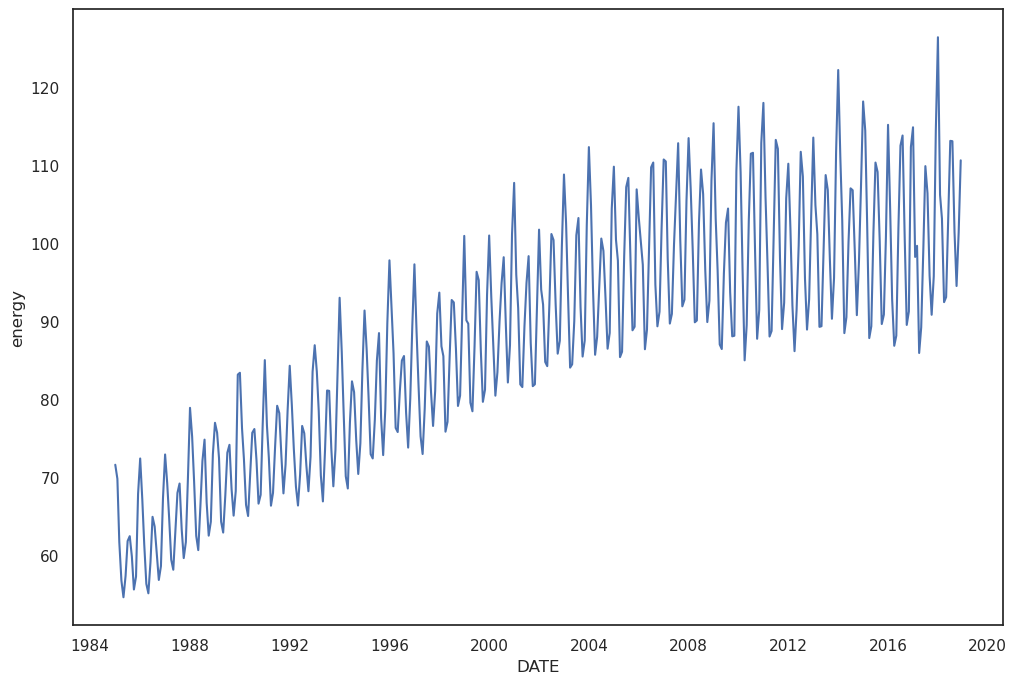

In [1152]:
series_temporais_teórica.gráfico_de_linha_lineplot(
    dataframe=df_energy,
    x='DATE',
    y='energy'
)

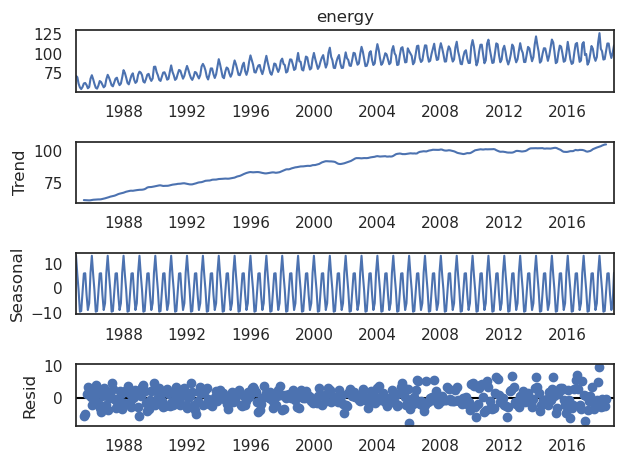

In [1153]:
series_temporais_teórica.gráfico_de_sazionalidade(
    dataframe=df_energy,
    x='DATE',
    y='energy'
)

### Modelo:

In [1154]:
series_temporais_teórica.melhores_parametros(
    dataframe=df_energy,
    x='DATE'
)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[6]             : AIC=1968.148, Time=0.49 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=2494.965, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=2053.701, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=2128.799, Time=0.22 sec
 ARIMA(1,1,1)(0,1,1)[6]             : AIC=2064.883, Time=0.35 sec
 ARIMA(1,1,1)(1,1,0)[6]             : AIC=inf, Time=0.32 sec
 ARIMA(1,1,1)(2,1,1)[6]             : AIC=1928.298, Time=0.89 sec
 ARIMA(1,1,1)(2,1,0)[6]             : AIC=inf, Time=1.08 sec
 ARIMA(1,1,1)(2,1,2)[6]             : AIC=1868.200, Time=1.59 sec
 ARIMA(1,1,1)(1,1,2)[6]             : AIC=1866.400, Time=1.47 sec
 ARIMA(1,1,1)(0,1,2)[6]             : AIC=2014.153, Time=0.65 sec
 ARIMA(0,1,1)(1,1,2)[6]             : AIC=1916.488, Time=1.18 sec
 ARIMA(1,1,0)(1,1,2)[6]             : AIC=1936.850, Time=0.98 sec
 ARIMA(2,1,1)(1,1,2)[6]             : AIC=1868.120, Time=2.07 sec
 ARIMA(1,1,2)(1,1,2)[6]             : AIC=1

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 1, 2, 6),
      suppress_warnings=True, with_intercept=False)

In [1155]:
treinamento = series_temporais_teórica.modelo_sarimax(
    dataframe=df_energy,
    arima=(1,1,1),
    x='DATE',
)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.46208D+00    |proj g|=  1.09977D-01

At iterate    5    f=  3.31689D+00    |proj g|=  3.36772D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     11      1     0     0   1.968D-06   3.315D+00
  F =   3.3149517710201533     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                               SARIMAX Results                                
Dep. Variable:                 energy   No. Observati

/home/guerrlr0/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/guerrlr0/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


<Figure size 800x600 with 0 Axes>

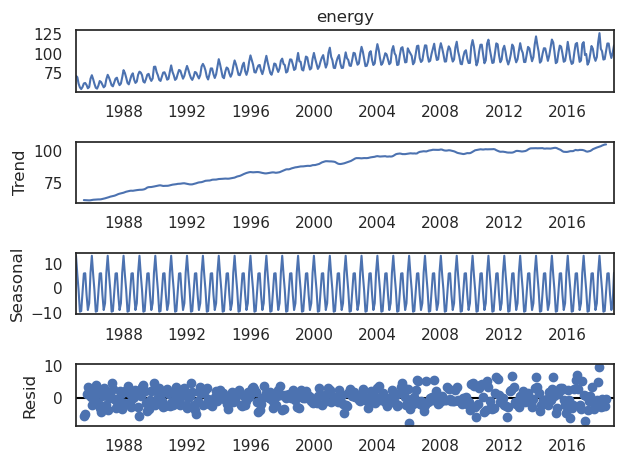

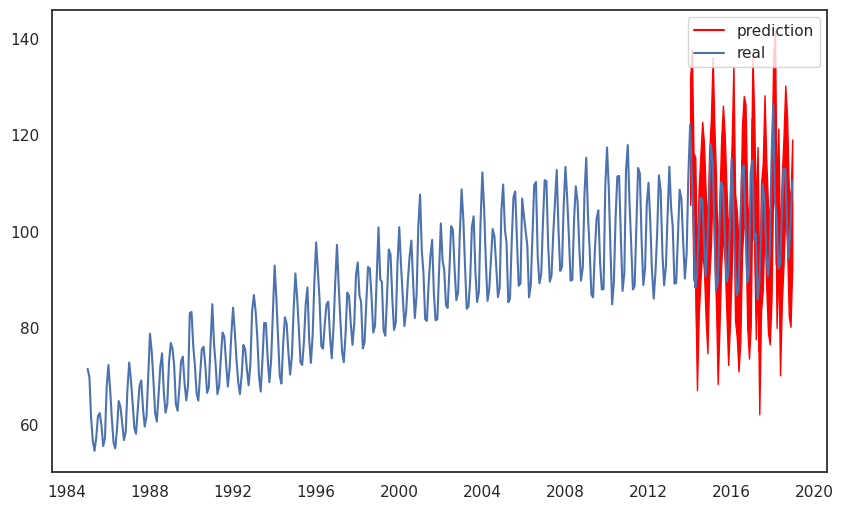

(105.5623023022151, 131.86700806967391, 118.71465518594451)

In [1156]:
series_temporais_teórica.backtesting(
    dataframe=df_energy, 
    x='DATE',
    treinamento=treinamento,
)

In [1157]:
treinamento = series_temporais_teórica.treinamento_xgb(
    dataframe=df_energy,
    x='DATE',
    y='energy'
)

/tmp/ipykernel_11709/4061638836.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treino['target'] = treino[y].shift(-1)
/tmp/ipykernel_11709/4061638836.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validacao['target'] = validacao[y].shift(-1)


# Case:

## Código:

In [1158]:
class DataUnderstanding():
    def verificando_as_dimensões_do_dataframe(self, dataframe):
        dataframe = dataframe.shape
        print(f'Linhas: {dataframe[0]} \nColunas: {dataframe[1]}')

    def descrição(self, dataframe):
        dataframe = dataframe.describe().round(decimals=2)
        display(dataframe)

    def verificando_tipos(self, dataframe):
        dataframe = (
            dataframe.dtypes
            .to_frame('Tipos')
        )
        display(dataframe)

    def verificando_valores_nulos(self, dataframe):
        valores_nulos = dataframe.isnull().sum()
        percent_missing = (valores_nulos / len(dataframe))
        dataframe = pd.DataFrame(
            {
            'Quantidade': valores_nulos,
            'Porcentagem': percent_missing
            }
        )
        dataframe = dataframe.style.format('{:.2%}', subset=['Porcentagem'])
        display(dataframe)
    
    def verificando_valores_duplicados(self, dataframe):
        valores_repetidos = dataframe.apply(lambda x: x.duplicated()).sum()
        percent_missing = (valores_repetidos / len(dataframe))
        dataframe = pd.DataFrame(
            {
                'Quantidade': valores_repetidos,
                'Porcentagem': percent_missing
            },
            index=dataframe.columns
        )

        dataframe = dataframe.style.format('{:.2%}', subset=['Porcentagem'])
        display(dataframe)

    def frequencia_da_repetição_dos_valores(self, dataframe, coluna):
        dataframe = dataframe[coluna].value_counts().reset_index()
        return dataframe

    def verificando_correlação(self, dataframe):
        dataframe = dataframe.corr()
        return dataframe

In [1159]:
class DataPreparetion(DataUnderstanding):
    def removendo_nulos(self, dataframe):
        return dataframe.dropna()

    def substituindo_valores(self, dataframe, colunas, valores):      
        return dataframe[colunas].replace(valores)
    
    def convertendo_para_inteiro(self, dataframe, colunas):
        return dataframe[colunas].astype(int)

    def dummy(self, dataframe, colunas=[]):
        dataframe = pd.get_dummies(dataframe, prefix=colunas)
        return dataframe
    
    def normalizando_os_dados(self, dataframe):
        return scale(dataframe)

In [1160]:
class DataVisualization(DataPreparetion):
    def gráfico_de_barras(self, dataframe, x, y):
        sns.barplot(
            data=dataframe,
            x=x,
            y=y
        )
        plt.show()

    def gráfico_de_linha_desempenho_do_modelo(self, y_true, y_pred):
        index = [i for i in range(1, len(y_pred)+1, 1)]

        fig = plt.figure(figsize=(12, 8))
        plt.plot(index, y_true, color='blue')
        plt.plot(index, y_pred, color='red')
        plt.xlabel('index')
        plt.ylabel('valores')
        plt.show()

    def gráfico_de_regressão_lmplot(self, dataframe, x, y, titulo):
        sns.lmplot(
            data=dataframe, 
            x=x,
            y=y
        )
        ax = plt.gca()
        ax.set_title(titulo)
        plt.show()

    def gráfico_de_correlação_pairplot(self, dataframe):
        sns.pairplot(dataframe)
        plt.show()

    def gráfico_de_correlação_heatmap(self, dataframe):
        sns.set(style='white')
        corr = dataframe.corr()
        plt.figure(figsize=(16, 10))
        sns.heatmap(corr, annot=True, cmap='RdBu_r', fmt='.2f', annot_kws={'size': 12})
        plt.show()

    def gráfico_outliers_boxplot(self, dataframe, figsize):
        dataframe = dataframe.select_dtypes(include='number')
        dataframe = dataframe.apply(scale)
        fig = plt.figure(figsize=figsize)
        sns.boxplot(data=dataframe)
        plt.show()

    def gráfico_de_distribuição_histplot(self, dataframe, coluna):
        sns.histplot(data=dataframe[coluna])

        plt.show()

In [1161]:
class Case(DataVisualization):
    def treinamento(self, dataframe, x, y):
        x_train, x_test, y_train, y_test = train_test_split(
            dataframe[x],
            dataframe[y],
            train_size=0.7,
            test_size=0.3,
            random_state=42
        )

        ln = LinearRegression()
        treinamento = ln.fit(x_train, y_train)

        y_pred = ln.predict(x_test)

        r2 = r2_score(y_true=y_test, y_pred=y_pred)

        print(f'Coeficiente de Determinação (R²): {r2}')

        return treinamento, y_pred, y_test

    def modelo_mrls(self, dataframe, function):
        model = smf.ols(formula=function, data=dataframe).fit() 
        print(model.summary())

    def previsão(self, treinamento, entrada):
        y_pred = treinamento.predict(entrada)
        return y_pred


if __name__ == '__main__':
    case = Case()

## Output:

### Data Understanding:

In [1162]:
display(df_insurance.head())

,idade,sexo,imc,quantidade_filhos,fumante,regiao,custos_seguro
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.560,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [1163]:
display(df_insurance.tail())

,idade,sexo,imc,quantidade_filhos,fumante,regiao,custos_seguro
1336,50,male,30.97,3,no,northwest,10600.5483
1337,18,female,31.92,0,no,northeast,2205.9808
1338,18,female,36.85,0,no,southeast,1629.8335
1339,21,female,25.80,0,no,southwest,2007.9450
1340,61,female,29.07,0,yes,northwest,29141.3603


In [1164]:
df_insurance.columns

Index(['idade', 'sexo', 'imc', 'quantidade_filhos', 'fumante', 'regiao',
       'custos_seguro'],
      dtype='object')

In [1165]:
case.verificando_as_dimensões_do_dataframe(dataframe=df_insurance)

Linhas: 1341 
Colunas: 7


In [1166]:
case.descrição(dataframe=df_insurance)

,idade,imc,quantidade_filhos,custos_seguro
count,1341.00,1341.00,1341.00,1341.00
mean,39.19,30.68,1.09,13240.73
std,14.04,6.11,1.21,12112.70
min,18.00,15.96,0.00,0.00
25%,27.00,26.32,0.00,4719.52
50%,39.00,30.40,1.00,9361.33
75%,51.00,34.77,2.00,16586.50
max,64.00,53.13,5.00,63770.43


In [1167]:
case.verificando_tipos(dataframe=df_insurance)

,Tipos
idade,int64
sexo,object
imc,float64
quantidade_filhos,int64
fumante,object
regiao,object
custos_seguro,float64


In [1168]:
case.verificando_valores_nulos(dataframe=df_insurance)

,Quantidade,Porcentagem
idade,0,0.00%
sexo,3,0.22%
imc,0,0.00%
quantidade_filhos,0,0.00%
fumante,0,0.00%
regiao,0,0.00%
custos_seguro,0,0.00%


In [1169]:
case.verificando_valores_duplicados(dataframe=df_insurance)

,Quantidade,Porcentagem
idade,1294,96.50%
sexo,1338,99.78%
imc,791,58.99%
quantidade_filhos,1335,99.55%
fumante,1339,99.85%
regiao,1337,99.70%
custos_seguro,3,0.22%


In [1170]:
colunas_qualitativa = ['sexo', 'fumante', 'regiao']
for coluna in colunas_qualitativa:
    print(f'{coluna}:')
    display(case.frequencia_da_repetição_dos_valores(dataframe=df_insurance, coluna=coluna))

sexo:


,index,sexo
0,male,676
1,female,662


fumante:


,index,fumante
0,no,1067
1,yes,274


regiao:


,index,regiao
0,southeast,364
1,northeast,327
2,southwest,325
3,northwest,325


### Data Preparetion:

In [1171]:
df_insurance = case.dummy(dataframe=df_insurance, colunas=colunas_qualitativa)

In [1172]:
df_insurance[df_insurance.columns] = case.normalizando_os_dados(dataframe=df_insurance)

### Data Visualization:

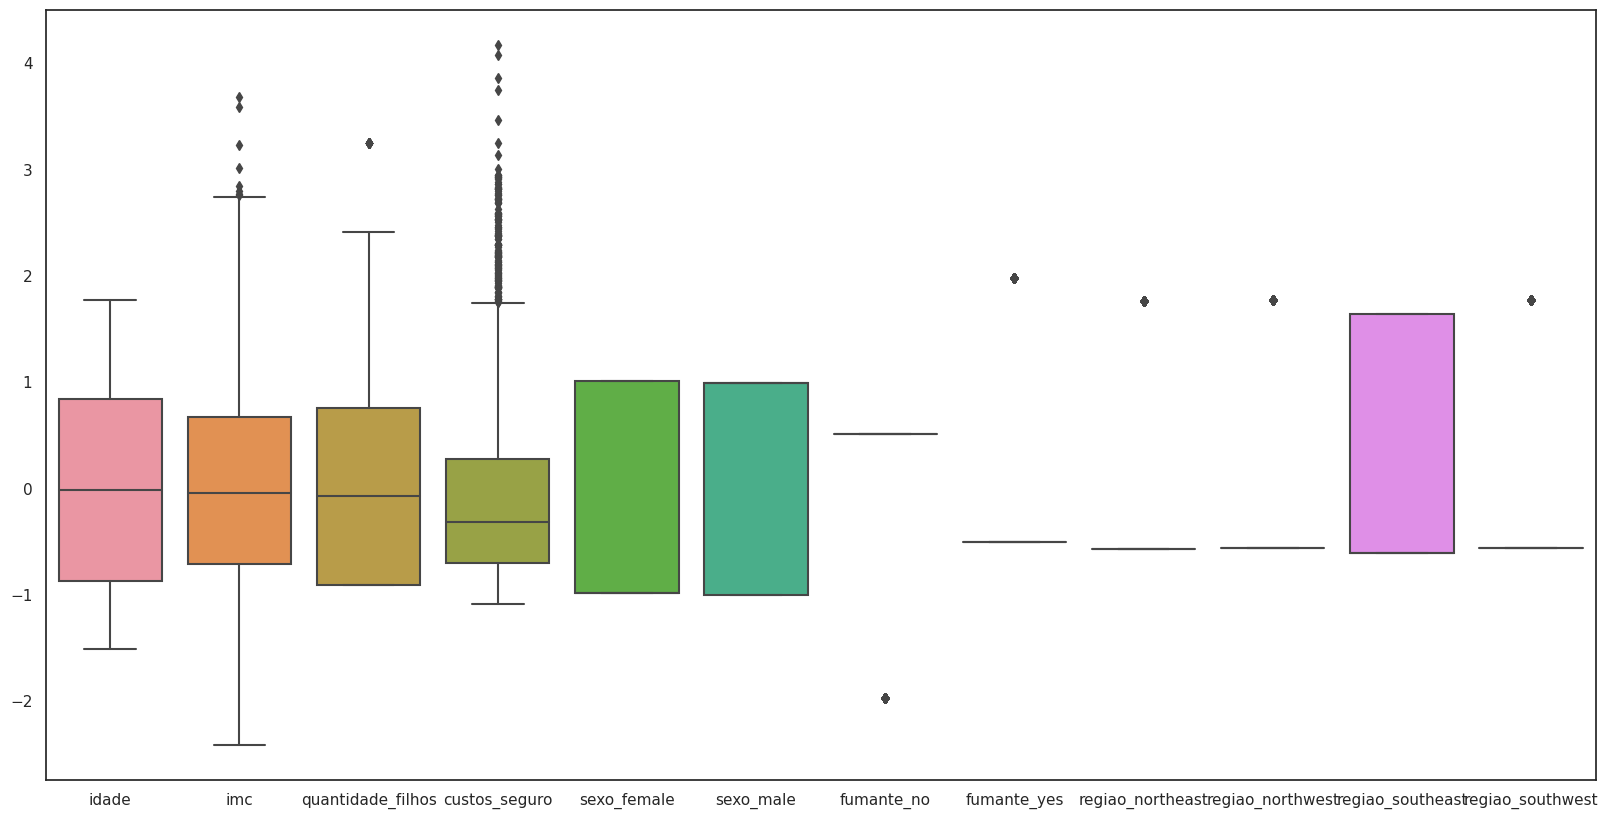

In [1173]:
case.gráfico_outliers_boxplot(dataframe=df_insurance, figsize=(20, 10))

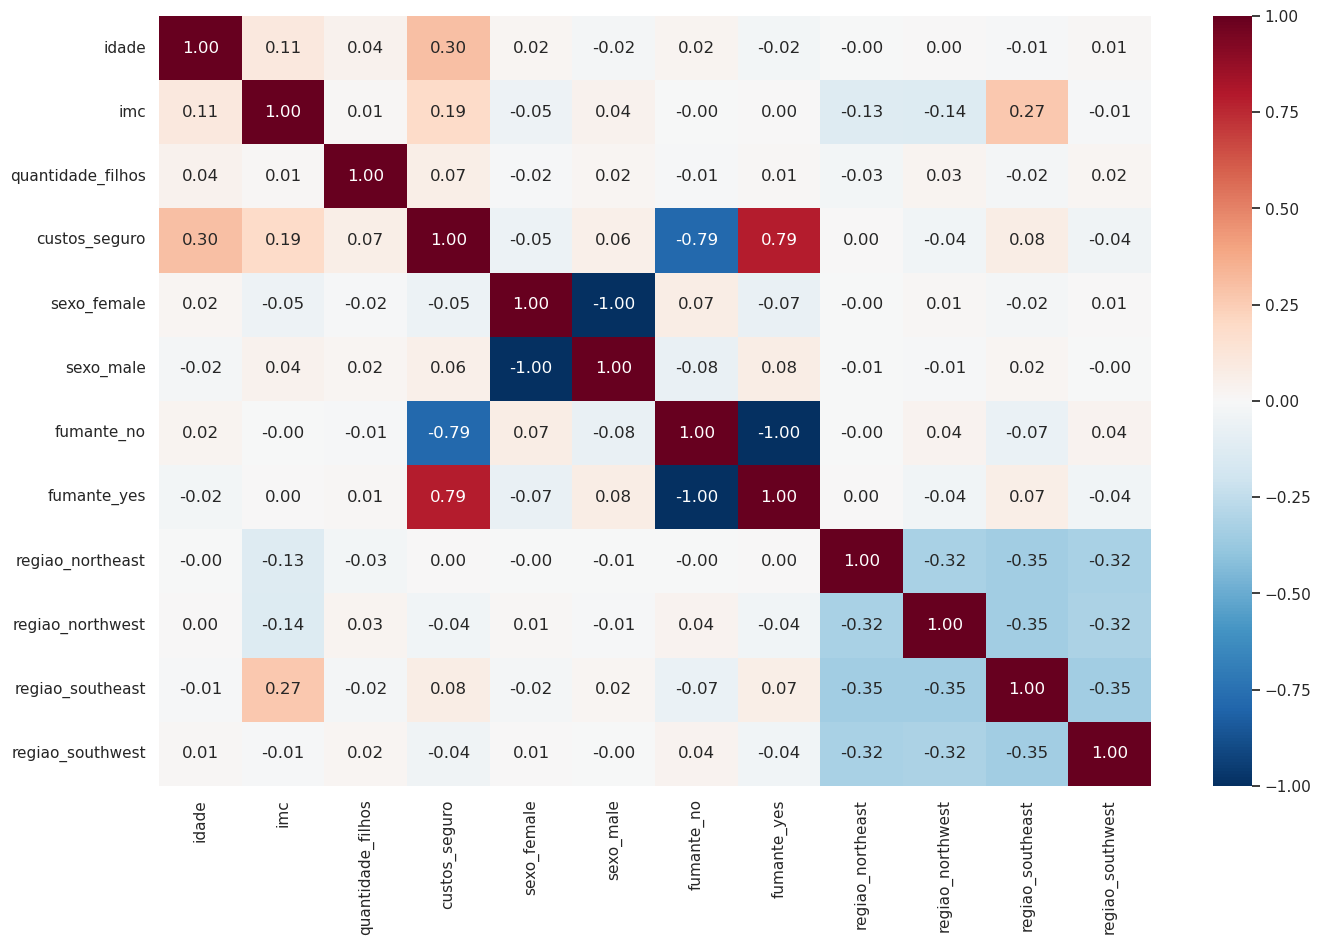

In [1174]:
case.gráfico_de_correlação_heatmap(dataframe=df_insurance)

In [1175]:
colunas = ['fumante_yes', 'custos_seguro']

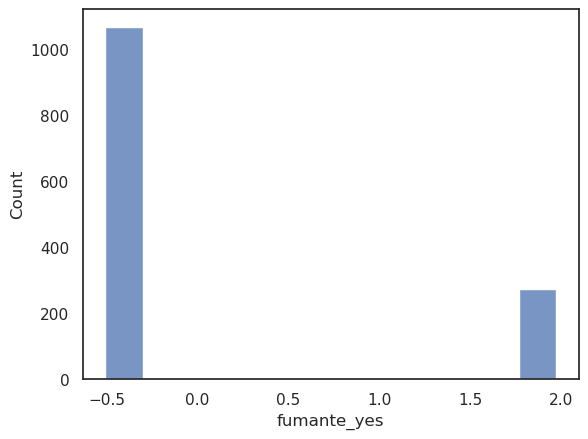

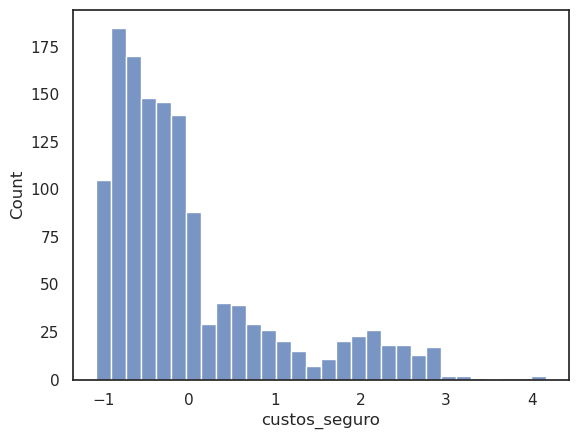

In [1176]:
for coluna in colunas:
    case.gráfico_de_distribuição_histplot(dataframe=df_insurance, coluna=coluna)

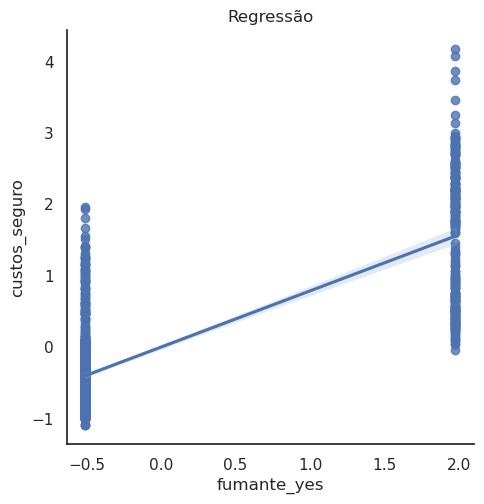

In [1177]:
case.gráfico_de_regressão_lmplot(
    dataframe=df_insurance,
    x='fumante_yes',
    y='custos_seguro',
    titulo='Regressão'
)

In [1178]:
df_insurance.columns

Index(['idade', 'imc', 'quantidade_filhos', 'custos_seguro', 'sexo_female',
       'sexo_male', 'fumante_no', 'fumante_yes', 'regiao_northeast',
       'regiao_northwest', 'regiao_southeast', 'regiao_southwest'],
      dtype='object')

In [1179]:
case.modelo_mrls(
    dataframe=df_insurance,
    function='custos_seguro~idade+imc+quantidade_filhos+sexo_female+sexo_male+fumante_yes+regiao_southeast-1'
)

                                 OLS Regression Results                                
Dep. Variable:          custos_seguro   R-squared (uncentered):                   0.751
Model:                            OLS   Adj. R-squared (uncentered):              0.749
Method:                 Least Squares   F-statistic:                              574.2
Date:                Fri, 09 Jun 2023   Prob (F-statistic):                        0.00
Time:                        12:03:25   Log-Likelihood:                         -971.12
No. Observations:                1341   AIC:                                      1956.
Df Residuals:                    1334   BIC:                                      1993.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [1181]:
x = ['idade', 'imc', 'quantidade_filhos', 'sexo_female', 'sexo_male', 'fumante_yes', 'regiao_southeast']

In [1182]:
treinamento, y_pred, y_test = case.treinamento(
    dataframe=df_insurance,
    x=x,
    y=['custos_seguro'],
)

Coeficiente de Determinação (R²): 0.77917216960447


In [1186]:
df_insurance['custos_seguro_predention'] = case.previsão(treinamento=treinamento, entrada=df_insurance[x])

In [1189]:
df_insurance['residuo'] = df_insurance['custos_seguro'] - df_insurance['custos_seguro_predention']

In [1191]:
display(df_insurance[['custos_seguro', 'custos_seguro_predention', 'residuo']].head())

,custos_seguro,custos_seguro_predention,residuo
0,0.300969,0.972454,-0.671484
1,-0.951025,-0.790357,-0.160668
2,-0.726061,-0.505093,-0.220967
3,0.722135,-0.782561,1.504696
4,-0.774177,-0.627829,-0.146348
